In [1]:
# !pip install squircle
# !pip install imutils

In [2]:
%config Completer.use_jedi = False

In [3]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import string
from PIL import Image, ImageFont, ImageDraw
import math

In [4]:
pathToDataForGeneration = "D:\Data\Diploma\dataForGeneration/"
pathToBackGrounds = pathToDataForGeneration + "Backgrounds"
pathToOutDir = "D:\Data\Diploma\generated/"
pathToGenerated = pathToOutDir + "generated"
pathToGT = pathToOutDir + "gt"
pathToFonts = pathToDataForGeneration + "fonts"
pathToFontsTitle = pathToDataForGeneration + "fontsTitle"
pathToFontsUnicode = pathToDataForGeneration + "fontsUnicode"
pathToPhoto = pathToDataForGeneration + "person"
pathToHolograms = pathToDataForGeneration + "hologram"
pathToTexts = pathToDataForGeneration + "texts/"

In [5]:
fontsTitle = [os.path.join(pathToFontsTitle, font) for font in os.listdir(pathToFontsTitle)]
fonts = [os.path.join(pathToFonts, font) for font in os.listdir(pathToFonts)]
fontsUnicode = [os.path.join(pathToFontsUnicode, font) for font in os.listdir(pathToFontsUnicode)]
photos = [os.path.join(pathToPhoto, photo) for photo in os.listdir(pathToPhoto)]
holograms = [os.path.join(pathToHolograms, photo) for photo in os.listdir(pathToHolograms)]

In [6]:
pathToBackGrounds

'D:\\Data\\Diploma\\dataForGeneration/Backgrounds'

In [7]:
backGroundColor = np.array([0,0,0])

In [8]:
def generateTextImage(text, font, fontScale, thickness, color):
    (label_width, label_height), baseline = cv2.getTextSize(text, font, fontScale, thickness)
    label_patch = np.zeros((label_height + baseline, label_width, 3), np.uint8)
    label_patch[:,:] = 0
    textImage = cv2.putText(label_patch, text, (0, label_height), font, fontScale, color, thickness)
    return textImage

In [9]:
#cv2.imwrite(pathToGenerated + "/2.png", cv2.cvtColor(image2, cv2.COLOR_RGB2BGR))

In [10]:
class TextGenerator:
    def __init__(self):
        self.symbols = list(string.ascii_lowercase)
        self.punct = list(string.punctuation)
        self.digits = [str(i) for i in range(0,10)]
        self.generatedWordsCount = -1
        with open(pathToTexts+"names.txt") as f:
            self.names = f.read().split()

        with open(pathToTexts+"surnames.txt") as f:
            self.surnames = f.read().split()

        with open(pathToTexts+"streets.txt") as f:
            self.streets = f.read().split()

        with open(pathToTexts+"cities.txt") as f:
            self.cities = f.read().split()
            
        self.words = []
        self.unicodeWords = []

        with open(pathToTexts+"words.txt") as f:
            self.words = f.read().split()
        
        for language in ["french", "italian", "spanish", "german", "czech", "danish", "dutch", "portuguese" ]:
            with open(pathToTexts+language + ".txt", encoding ="utf-8") as f:
                self.unicodeWords += f.read().split()

    def getName(self):
        k = np.random.randint(0, len(self.names))
        return self.names[k]

    def getSurname(self):
        k = np.random.randint(0, len(self.surnames))
        return self.surnames[k]

    def getCity(self):
        k = np.random.randint(0, len(self.cities))
        return self.cities[k]

    def getStreet(self):
        k = np.random.randint(0, len(self.streets))
        return self.streets[k]

    def getWord(self):
        k = np.random.randint(0, len(self.words))
        return self.words[k]
    def getUnicodeWord(self):
        k = np.random.randint(0, len(self.unicodeWords))
        return self.unicodeWords[k]

    def getDate(self):
        sep = np.random.choice(self.punct)
        day = str(np.random.randint(0,10)) + str(np.random.randint(0,10))
        month = str(np.random.randint(0,10)) + str(np.random.randint(0,10))
        year = str(np.random.randint(0,10)) + str(np.random.randint(0,10)) + str(np.random.randint(0,10)) + str(np.random.randint(0,10))
        if np.random.randint(0,2) == 0:
            return sep.join([day, month, year])
        else:
            return sep.join([year, month, day])

    def getNumber(self):
        length = np.random.randint(2, 15)
        return "".join([np.random.choice(self.digits) for i in range(length)])
    
    def generetaAdditionalText(self):
        text = ""
        addDigit = np.random.randint(0, 2)
        length = np.random.randint(addDigit == 0, 5)
        if length > 0:
            text += "".join([np.random.choice(self.digits) for i in range(length)])
        length = np.random.randint(addDigit != 0, 5)
        if length > 0:
            text += "".join([np.random.choice(self.symbols) for i in range(length)])
        if np.random.randint(0, 5) == 1:
            text += np.random.choice(self.punct)
        return text

    def _generateText(self):
        self.generatedWordsCount += 1
        if self.generatedWordsCount < 2:
            return self.getName()
        elif self.generatedWordsCount < 4:
            return self.getSurname()
        elif self.generatedWordsCount < 6:
            return self.getCity()
        elif self.generatedWordsCount < 8:
            return self.getStreet()
        elif self.generatedWordsCount < 10:
            return self.getDate()
        elif self.generatedWordsCount < 12:
            return self.getNumber()
        elif self.generatedWordsCount < 25:
            return self.generetaAdditionalText()
        else:
            return None
        
        
    def generateText(self):
        text = self._generateText()
        if text is None:
            return None
#         for c in text:
#             if c not in characters:
#                 print(text)
#                 print(c)
#             assert(c in characters)
        return text
        
    
    def generateWord(self, isUnicode):
        if isUnicode:
            return self.getUnicodeWord()
        else:
            return self.getWord()

    def resetWords(self):
        self.generatedWordsCount = -1
        
TextGeneratorGlobal = TextGenerator()

In [11]:
characters = set()
for word in TextGeneratorGlobal.unicodeWords:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.words:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.cities:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.digits:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.names:
    for c in word:
        characters.add(c)
        
for word in TextGeneratorGlobal.streets:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.surnames:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.symbols:
    for c in word:
        characters.add(c)
for c in string.punctuation:
        characters.add(c)
characters = list(characters)

In [12]:
#TextGeneratorGlobal.unicodeWords[:100]

In [13]:
import matplotlib
matplotlib.use('Agg')
def addPlotToBackGround(image):
    W,H = image.size
    fig, ax = plt.subplots(figsize=(20,20))
    ax.set_ylim([0,H])
    ax.set_xlim([0,W])
    ax.imshow(image)
    x = np.linspace(1,W, W*3)
    ax.set_axis_off()
    if np.random.randint(0,5) == 0:
        cnt = np.random.randint(1,10)
        for i in range(cnt):
            y = np.sin(x * np.exp(np.random.uniform(-5,-1))) * H // cnt + i * H // cnt + np.random.randint(-H // cnt,H // cnt)
            ax.plot(x,y, color=np.random.rand(3,))
    
    if np.random.randint(0,5) ==0:
        cnt = np.random.randint(1,50)
        for i in range(cnt):
            y = 1/(x)* H // cnt + i * H // cnt + np.random.randint(-H // cnt,H // cnt)
            ax.plot(x + np.random.randint(-W, W),y, color=np.random.rand(3,))

    if np.random.randint(0,5) == 0:
        cnt = np.random.randint(1,100)
        for i in range(cnt):
            y = x**(np.random.uniform(0.2,3)) * np.exp(np.random.uniform(-5,1)) + np.random.randint(-H // cnt,H // cnt)
            ax.plot(x + np.random.randint(-W, W),y, color=np.random.rand(3,))            
    
    fig.savefig("./i.png",bbox_inches='tight', pad_inches=0)
    plt.close(1)
    return Image.open("./i.png")

In [14]:
# imageTextGenerator = OneImageTextGenerator(image)
# imageTextGenerator.generate()
# imageTextGenerator.image2

In [15]:
def rotatePoint(xy, theta):
    theta = math.pi / 180 * theta
    cos_theta, sin_theta = math.cos(theta), math.sin(theta)

    return ( xy[0] * cos_theta - xy[1] * sin_theta, xy[0] * sin_theta + xy[1] * cos_theta )
    
def rotateRect(rect, theta):
    h = rect[3] - rect[1]
    w = rect[2] - rect[0]
    hc = rect[1] + (h)//2 + 5
    wc = rect[0] + (w)//2 
    #h = 0
    #w = 0
#     x1, y1 = rotatePoint((rect[0] - w, rect[1] - h), theta)
#     x2, y2 = rotatePoint((rect[2] - w, rect[1] - h), theta)
#     x3, y3 = rotatePoint((rect[2] - w, rect[3] - h), theta)
#     x4, y4 = rotatePoint((rect[0] - w, rect[3] - h), theta)
    x1, y1 = rotatePoint((-rect[4]//2, -rect[5]//2), theta)
    x2, y2 = rotatePoint((rect[4]//2, -rect[5]//2), theta)
    x3, y3 = rotatePoint((rect[4]//2, rect[5]//2), theta)
    x4, y4 = rotatePoint((-rect[4]//2, rect[5]//2), theta)
    
    #по часовой стрелке
    #return [(x1+w,y1+h), (x2+w,y2+h), (x3+w,y3+h), (x4+w,y4+h)]
    return [(x1+wc,y1+hc), (x2+wc,y2+hc), (x3+wc,y3+hc), (x4+wc,y4+hc)]

def rotateRect(rect, theta, hc = None, wc = None):
    h = rect[3] - rect[1]
    w = rect[2] - rect[0]
    if hc is None:
        hc = rect[1] + (h)//2 + 5
        wc = rect[0] + (w)//2 
    x1, y1 = rotatePoint((rect[0] - wc, rect[1] - hc), theta)
    x2, y2 = rotatePoint((rect[2] - wc, rect[1] - hc), theta)
    x3, y3 = rotatePoint((rect[2] - wc, rect[3] - hc), theta)
    x4, y4 = rotatePoint((rect[0] - wc, rect[3] - hc), theta) 
    
    #по часовой стрелке
    #return [(x1+w,y1+h), (x2+w,y2+h), (x3+w,y3+h), (x4+w,y4+h)]
    return [(x1+wc,y1+hc), (x2+wc,y2+hc), (x3+wc,y3+hc), (x4+wc,y4+hc)]

def rotateRegion(region, theta, wc, hc):
    #h = 0
    #w = 0
#     x1, y1 = rotatePoint((rect[0] - w, rect[1] - h), theta)
#     x2, y2 = rotatePoint((rect[2] - w, rect[1] - h), theta)
#     x3, y3 = rotatePoint((rect[2] - w, rect[3] - h), theta)
#     x4, y4 = rotatePoint((rect[0] - w, rect[3] - h), theta)
    x1, y1 = rotatePoint((region[0][0] - wc, region[0][1] - hc), theta)
    x2, y2 = rotatePoint((region[1][0] - wc, region[1][1] - hc), theta)
    x3, y3 = rotatePoint((region[2][0] - wc, region[2][1] - hc), theta)
    x4, y4 = rotatePoint((region[3][0] - wc, region[3][1] - hc), theta)
    
    #по часовой стрелке
    #return [(x1+w,y1+h), (x2+w,y2+h), (x3+w,y3+h), (x4+w,y4+h)]
    return [(x1+wc,y1+hc), (x2+wc,y2+hc), (x3+wc,y3+hc), (x4+wc,y4+hc)]

def getCharactersRects(wordRegionData, rotated, charactersRects):
    k = wordRegionData
    cumW = 0
    W =  rotated[1][0]- rotated[0][0]
    H =  rotated[1][1] - rotated[0][1]
    characersResultRects = []
    for c in charactersRects:
        w,h = c
        cumW += w
        characersResultRects.append([
            (rotated[0][0] + (cumW - w) / k[6] * W, rotated[0][1] + (cumW - w)/k[6] * H), \
            (rotated[0][0] + cumW / k[6] * W, rotated[0][1] + (cumW) / k[6] * H), \
            (rotated[3][0] + cumW / k[6] * W, rotated[3][1] + (cumW) / k[6] * H),\
            (rotated[3][0] + (cumW - w) / k[6] * W, rotated[3][1] + (cumW-w) / k[6] * H)\
        ])
        rotated[0][0] + cumW / k[6] * W, rotated[0][1] + (cumW) / k[6] * H
    return characersResultRects

In [16]:
import json

In [17]:
class OneImageTextGenerator:
    def __init__(self, image):
        self.imageSize = [1500, 1500//1.5]
        image = self.randomCropAndResize(image)
        
        image = addPlotToBackGround(image)
        image = self.addHologram(image)
        self.size = image.size[::-1]#image.shape[0:2]
        self.image2 = image.copy().convert("RGBA")
        self.image = Image.new('RGBA', self.size[::-1], color=(255,255,255, 0))
        self.freeBlocks = [(0,0,*self.size)]
        self.textImage = Image.new('RGBA', self.size[::-1], color=(255,255,255, 0))
        self.textGenerator = TextGeneratorGlobal
        self.textGenerator.resetWords()
        self.words = []
        self.wordsRegion = []
        self.angles = []
        self.wordsCharacterRegion = []
        img_fraction = 1/20
        self.fontSizes = []
        self.hasTitle = False
        fontSize = 1
        font = ImageFont.truetype(fonts[0], fontSize)
        draw = ImageDraw.Draw(self.textImage)
        while max(draw.textsize("H", font=font)) < img_fraction * min(image.size):
            # iterate until the text size is just larger than the criteria
            fontSize += 1            
            font = ImageFont.truetype(fonts[0], fontSize)
        self.fontSizes.append(fontSize)
        
        font = ImageFont.truetype(fonts[0], 1)
        self.titleSize = 1
        img_fraction = 1/10
        while max(draw.textsize("H", font=font)) < img_fraction * min(image.size):
            # iterate until the text size is just larger than the criteria
            self.titleSize += 1            
            font = ImageFont.truetype(fonts[0], self.titleSize)
       # self.fontSizes.append(min(1, fontSize//1.5))
        self.fontSizes.append(fontSize*2)
        
        self.fonts = []
        self.fontsUnicode = []
        for i in range(np.random.randint(1, 3)):
            self.fonts.append(np.random.choice(fonts))
            
        for i in range(np.random.randint(1, 3)):
            self.fontsUnicode.append(np.random.choice(fontsUnicode))
            #print(self.fontsUnicode[-1])
            
        self.textType = []
        for i in range(np.random.randint(1, 3)):
            self.textType.append(np.random.choice([0,1,2]))
        self.colors = [(0,0,0,255)]
        for i in range(np.random.randint(0,4)):
            color = [0,0,0, 255]
            color[np.random.randint(0,3)] = np.random.randint(128,200)
            color[0] = min(color[0] + np.random.randint(0,255),255)
            color[2] = min(color[2] + np.random.randint(0,255),255)
            color[1] = min(color[1] + np.random.randint(0,255),255)
            self.colors.append(color)
            #self.colors.append(self.colors[0])
        
        self.possibleAngles = [0]
        
        for i in range(np.random.randint(0,3)):
            self.possibleAngles.append(np.random.randint(-5,5))
            self.possibleAngles.append(0)
    
    def addHologram(self, image):
        k = np.random.randint(0,3)
        if k == 0:
            return image
        cnt = np.random.randint(0, k*10)
        for i in range(cnt):
            image = np.array(image)
            H, W,_ = image.shape

            colors = []
            for i in range(2):
                color = [0,0,0, 255]
                color[np.random.randint(0,3)] = np.random.randint(128,200)
                color[0] = min(color[0] + np.random.randint(0,255),255)
                color[2] = min(color[2] + np.random.randint(0,255),255)
                color[1] = min(color[1] + np.random.randint(0,255),255)
                colors.append(color)

            isHor = np.random.randint(0,2,(3))

            w = np.random.randint(W//10 , W//2)
            h = np.random.randint(H//10, H//2)
            array = get_gradient_3d(w, h, colors[0], colors[1], isHor)


            im = Image.fromarray(np.uint8(array))
            im.putalpha(np.random.randint(50,180))
            im = np.array(im)

            if np.random.randint(0,3) == 0:
                for i in range(1,20):
                    r = np.random.randint(min(w,h)//5,min(w,h)//2)//4
                    x = np.random.randint(r,w-r)
                    y = np.random.randint(r,h-r)

                    g = 255
                    im[y-r:y+r,x-r:x+r,3] = (im[y-r:y+r,x-r:x+r,3] * g / 256).astype(np.uint8)

            if np.random.randint(0,2) == 0:
                for i in range(0,min(w,h)//4):
                    rx = np.random.randint(2,w//2)
                    ry = np.random.randint(2,h//2)

                    if np.random.randint(0,2) == 0:
                        rx = 2
                    else:    
                        ry = 2

                    x = np.random.randint(rx,w-rx)
                    y = np.random.randint(ry,h-ry)

                    im[y-ry:y+ry,x-rx:x+rx,3] = 0

            im = Image.fromarray(im)
            distortedImage = Image.fromarray(image)


            distortedImage.paste(im, (np.random.randint(0, W - w//2), np.random.randint(0, H - h//2)))
            image= Image.alpha_composite(Image.fromarray(image).copy(), distortedImage)
        return image
    
    def randomCropAndResize(self, image):
        size = self.imageSize
        size[0] += np.random.randint(-200, 200)
        size[1] += np.random.randint(-200, 200)
        sizeCrop = size.copy()
        size[0] = int(size[0] * np.random.uniform(1.1,2))
        size[1] = int(size[1] * np.random.uniform(1.1,2))
        image = image.resize(size)
        assert(size != sizeCrop)
        left = np.random.randint(0, size[0] - sizeCrop[0])
        top = np.random.randint(0, size[1] - sizeCrop[1])
        image = image.crop((left, top, left + sizeCrop[0], top + sizeCrop[1]))
        
        return image
        
    def findSmallestByHeightBlock(self, size):
        blocks = []
        p = []
        for i, block in enumerate(self.freeBlocks):
            y1,x1,y2,x2 = block
            h = y2 - y1
            w = x2 - x1
            if h >= size[0] and w >= size[1]:
                blocks.append(i)
                p.append(h*w)
        if len(blocks) == 0:
            return None
        return np.random.choice(blocks, p=np.array(p) / np.sum(p))
        
    def findFreeRectangeForText(self, size):
        size = (size[0]*1.5, size[1]*1.5)
        index = self.findSmallestByHeightBlock(size)
        if index == None:
            return None
        h, w = size
        h = h
        w = w
        rect = self.freeBlocks[index]
        y1,x1,y2,x2 = rect
        startX = np.random.randint(x1, x2 - w + 1)
        startY = np.random.randint(y1, y2 - h + 1)
        
        self.freeBlocks.pop(index)
        if startY > y1:
            self.freeBlocks.append((y1, x1, startY, x2))
        if startY + h < y2:
            self.freeBlocks.append((startY+h, x1, y2, x2))
        if x1 < startX:
            self.freeBlocks.append((startY, x1, startY+h, startX))
        if startX + w < x2:
            self.freeBlocks.append((startY, startX+w, startY+h, x2))
        
        return (startY, startX)

    def addPhoto(self):
        photo = Image.open(np.random.choice(photos), 'r')
        height, width = self.size
        height = height // 4
        width = width // 4
        height, width = max(height, width), min(height, width)

        photo1 = photo.resize((width,height), Image.ANTIALIAS)
        if np.random.randint(0,20) == 0:
            photo1 = photo1.convert('L')
        
        coords = self.findFreeRectangeForText((height, width))
        if coords == None:
            return None
        startY, startX = coords
        self.image.paste(photo1, (startX, startY))        
        
    def addText(self):
        text = self.textGenerator.generateText()
        isTitle = False
        if text is None:
            isUnicode = np.random.randint(0,3) != 0
            if isUnicode:
                font = np.random.choice(self.fontsUnicode)
            else:
                font = np.random.choice(self.fonts)
            text = self.textGenerator.generateWord(isUnicode)
        else:
            font = np.random.choice(self.fonts)
            if not self.hasTitle:# and np.random.randint(0,3) == 0:
                isTitle = True
                self.hasTitle = True
                font = np.random.choice(fontsTitle)
        if isTitle:
            textType = 1
        else:
            textType = np.random.choice(self.textType)
            
        if textType == 0:
            text = text.lower()
        elif textType == 1:
            text = text.upper()
        else:
            text = text.capitalize()
            
        if np.random.randint(0,5) == 0:
            textType = np.random.choice(self.textType)
            text2 = self.textGenerator.generetaAdditionalText()
            if textType == 0:
                text2 = text2.lower()
            elif textType == 1:
                text2 = text2.upper()
            else:
                text2 = text2.capitalize()
            text = text2 + text
#         print(text) 
#         print(font)

        fontSize = max(10, np.random.choice(self.fontSizes, p=[0.7,0.3]) + np.random.randint(-5, 5))
        if np.random.randint(0, 10) == 0:
            fontSize += np.random.randint(16, 20)
        if isTitle:
            fontSize = self.titleSize
            fontSize += np.random.randint(0, 80)
        font = ImageFont.truetype(font, fontSize)
        
        draw = ImageDraw.Draw(self.image)
        drawImageText = ImageDraw.Draw(self.textImage)
        alpha = np.random.choice(self.possibleAngles)
        h,w = draw.textsize(text, font=font)[::-1]
        angleRad = np.abs(alpha * np.pi / 180)
        h1 = h * np.cos(angleRad) + w * np.sin(angleRad)
        w1 = w * np.cos(angleRad) + h * np.sin(angleRad)
        coords = self.findFreeRectangeForText((h1,w1))
        if coords == None:
            return None
        startY, startX = coords
        
        color = self.colors[np.random.randint(0, len(self.colors))]
        txt = Image.new('L', (w,h))
        d = ImageDraw.Draw(txt)
        d.text((0, 0), text,  font=font, fill=255)
        #d.rectangle((startX, startY, startX + w,startY + h ),fill=(192), outline=(255))
        #d.rectangle((startX + w, startY + h, startX,startY),fill=(192), outline=(255))
        #d.line((startX, startY, startX, startY + h), fill=(255), width=2)
        #d.line((startX, startY, startX + w, startY), fill=(255), width=2)
        #d.line((startX + w, startY, startX + w, startY + h), fill=(255), width=20)
        #d.line((startX, startY + h, startX + w, startY + h), fill=(255), width=20)
        
        #rotatedText=txt.rotate(alpha, expand=True)
        rotatedText=txt.rotate(alpha, expand=True)
        #rotatedText.show()
        newW, newH = rotatedText.size
        
        self.textImage.paste( ImageOps.colorize(rotatedText, (0,0,0,255), (0,0,0, 255)), (startX, startY),  rotatedText)
        self.image.paste( ImageOps.colorize(rotatedText, (0,0,0, 255), tuple(color)), (startX, startY),  rotatedText)
        
        self.words.append(text)
        #self.wordsRegion.append(rotateRect([startX, startY, startX + w, startY + h], alpha))
        self.wordsRegion.append([startX, startY, startX + w1, startY + h1, w+2, h+2, newW ,newH, w1, h1])
        self.angles.append(alpha)
        #print(alpha)
        #draw.text((startX, startY), text,  font=font, fill=(tuple(color)))
        #drawImageText.text((startX, startY), text,  font=font, fill=(0,0,0,255))
        self.wordsCharacterRegion.append([])
        for symbol in text:
            h,w = draw.textsize(symbol, font=font)[::-1]
            self.wordsCharacterRegion[-1].append([w,h])
        return True
        
    def addTexts(self):
        textCount = np.random.randint(40, 80)
        cnt = 0
        for i in range(textCount):
            if self.addText() is not None :
                cnt += 1
        #print(cnt)
        self.image2 = Image.alpha_composite(self.image2, self.image)
       # assert(self.hasTitle)
#         img = ImageDraw.Draw(self.image2)
#         for block in self.freeBlocks:
            
#             img.rectangle([block[1], block[0], block[3], block[2]])
            
#         self.image2.show()
    
    def rotateRects(self):
        for i, (k,a, characters) in enumerate(zip(self.wordsRegion, self.angles, self.wordsCharacterRegion)):
            self.wordsRegion[i] = rotateRect(k,-a, k[1] + k[-3]//2, k[0] + k[-4]//2)
            
            self.wordsCharacterRegion[i] = getCharactersRects(k, self.wordsRegion[i], characters)
    
    def createAnnotation(self):
        self.annotation = dict()
        self.annotation["wordRects"] = self.wordsRegion
        self.annotation["wordsCharactersRects"] = self.wordsCharacterRegion
        self.annotation["words"] = self.words
    
    def generate(self):
        self.addPhoto()
        self.addTexts()
        self.rotateRects()
        self.createAnnotation()

In [18]:
# imageTextGenerator = OneImageTextGenerator(image)
# imageTextGenerator.generate()
# img = imageTextGenerator.image2.copy()
# for k in zip(imageTextGenerator.annotation["wordRects"]):
#     d = ImageDraw.Draw(img)
#     #rotated = rotateRect(k, imd.angle)
# #     d.line((rotated[0], rotated[1], rotated[0], rotated[3]), fill=(100,100,100), width=2)
# #     d.line((k[0], k[1], k[2], k[1]), fill=(100,100,100), width=2)
# #     d.line((k[2], k[1], k[2], k[3]), fill=(100,100,100), width=2)
# #     d.line((k[0], k[3], k[2], k[3]), fill=(100,100,100), width=2)
#     rotated = k[0]
#     k = k[0]
#     rotated = k

    
#     d.line((*rotated[0], *rotated[1]), fill=(195,0,0), width=1)
#     d.line((*rotated[1], *rotated[2]), fill=(195,0,0), width=1)
#     d.line((*rotated[2], *rotated[3]), fill=(195,0,0), width=1)
#     d.line((*rotated[3], *rotated[0]), fill=(195,0,0), width=1)

   
#     #break
# img

In [19]:
# img = imageTextGenerator.textImage.copy()
# ind = 0
# for k,a, characters in zip(imageTextGenerator.wordsRegion, imageTextGenerator.angles, imageTextGenerator.wordsCharacterRegion):
#     d = ImageDraw.Draw(img)
#     rotated = rotateRect(k,-a)
#     ind = ind + 1
#     #print(k)
#     #print(a)
#     #print(rotated)
# #     d.line((rotated[0][0], rotated[0][1], rotated[1][0], rotated[1][1]), fill=(100,100,100), width=2)
# #     d.line((rotated[1][0], rotated[1][1], rotated[2][0], rotated[2][1]), fill=(100,100,100), width=2)
# #     d.line((rotated[2][0], rotated[2][1], rotated[3][0], rotated[3][1]), fill=(100,100,100), width=2)
# #     d.line((rotated[3][0], rotated[3][1], rotated[0][0], rotated[0][1]), fill=(100,100,100), width=2)
    
# #     cumW = 0
# #     W =  rotated[1][0]- rotated[0][0]
# #     H =  rotated[1][1] - rotated[0][1]
# #     for c in characters:
# #         w,h = c
# #         cumW += w
# #         d.line((rotated[0][0] + (cumW - w) / k[6] * W, rotated[0][1] + (cumW - w) / k[6] * H, rotated[0][0] + cumW / k[6] * W, rotated[0][1] + (cumW) / k[6] * H), fill=(100,100,100), width=2)
# #         d.line((rotated[0][0] + cumW / k[6] * W, rotated[0][1] + (cumW) / k[6] * H, rotated[3][0] + cumW / k[6] * W, rotated[3][1] + (cumW) / k[6] * H), fill=(100,100,100), width=2)
# #         d.line((rotated[3][0] + cumW / k[6] * W, rotated[3][1] + (cumW) / k[6] * H, rotated[3][0] + (cumW -w)/ k[6] * W, rotated[3][1] + (cumW-w) / k[6] * H), fill=(100,100,100), width=2)
# #         d.line((rotated[3][0] + (cumW - w) / k[6] * W, rotated[3][1] + (cumW-w) / k[6] * H, rotated[0][0] + (cumW - w) / k[6] * W, rotated[0][1] + (cumW - w) / k[6] * H), fill=(100,100,100), width=2)
#     for c in getCharactersRects(k, rotated, characters):
#         d.line((c[0][0], c[0][1], c[1][0], c[1][1]), fill=(100,100,100), width=1)
#         d.line((c[1][0], c[1][1], c[2][0], c[2][1]), fill=(100,100,100), width=1)
#         d.line((c[2][0], c[2][1], c[3][0], c[3][1]), fill=(100,100,100), width=1)
#         d.line((c[3][0], c[3][1], c[0][0], c[0][1]), fill=(100,100,100), width=1)
#     #break 
# img

In [20]:
# img = imageTextGenerator.textImage.copy()
# ind = 0
# for k,a  in zip(imageTextGenerator.wordsRegion, imageTextGenerator.angles):
#     d = ImageDraw.Draw(img)
#     rotated = rotateRect(k,-a)
#     ind = ind + 1
#     #print(k)
#     #print(a)
#     #print(rotated)
#     d.line((rotated[0][0], rotated[0][1], rotated[1][0], rotated[1][1]), fill=(100,100,100), width=2)
#     d.line((rotated[1][0], rotated[1][1], rotated[2][0], rotated[2][1]), fill=(100,100,100), width=2)
#     d.line((rotated[2][0], rotated[2][1], rotated[3][0], rotated[3][1]), fill=(100,100,100), width=2)
#     d.line((rotated[3][0], rotated[3][1], rotated[0][0], rotated[0][1]), fill=(100,100,100), width=2)
    
# #     d.line((k[0], k[1], k[0], k[3]), fill=(100,100,100), width=2)
# #     d.line((k[0], k[1], k[2], k[1]), fill=(100,100,100), width=2)
# #     d.line((k[2], k[1], k[2], k[3]), fill=(100,100,100), width=2)
# #     d.line((k[0], k[3], k[2], k[3]), fill=(100,100,100), width=2)
#     #break 
# img

In [21]:
#imageTextGenerator.textImage

In [22]:
# img = imageTextGenerator.textImage.copy()
# for k,a  in zip(imageTextGenerator.wordsRegion, imageTextGenerator.angles):
#     d = ImageDraw.Draw(img)
#     rotated = rotateRect(k,a)
# #     d.line((rotated[0], rotated[1], rotated[0], rotated[3]), fill=(100,100,100), width=2)
# #     d.line((k[0], k[1], k[2], k[1]), fill=(100,100,100), width=2)
# #     d.line((k[2], k[1], k[2], k[3]), fill=(100,100,100), width=2)
# #     d.line((k[0], k[3], k[2], k[3]), fill=(100,100,100), width=2)
    
    
#     rotated = rotateRect(k,a)
#     print(a)
#     print(k)
#     d.line((*rotated[0], *rotated[1]), fill=(195,195,195), width=1)
#     d.line((*rotated[1], *rotated[2]), fill=(195,195,195), width=1)
#     d.line((*rotated[2], *rotated[3]), fill=(195,195,195), width=1)
#     d.line((*rotated[3], *rotated[0]), fill=(195,195,195), width=1)
#     print(rotated)
#     break
# img

In [23]:
import cv2
import numpy as np
import random
from scipy.stats import norm

def generate_spot_light_mask(mask_size,
                             position=None,
                             max_brightness=255,
                             min_brightness=0,
                             mode="gaussian",
                             linear_decay_rate=None,
                             speedup=False):
    """
    Generate decayed light mask generated by spot light given position, direction. Multiple spotlights are accepted.
    Args:
        mask_size: tuple of integers (w, h) defining generated mask size
        position: list of tuple of integers (x, y) defining the center of spotlight light position,
                  which is the reference point during rotating
        max_brightness: integer that max brightness in the mask
        min_brightness: integer that min brightness in the mask
        mode: the way that brightness decay from max to min: linear or gaussian
        linear_decay_rate: only valid in linear_static mode. Suggested value is within [0.2, 2]
        speedup: use `shrinkage then expansion` strategy to speed up vale calculation
    Return:
        light_mask: ndarray in float type consisting value from max_brightness to min_brightness. If in 'linear' mode
                    minimum value could be smaller than given min_brightness.
    """
    if position is None:
        position = [(random.randint(0, mask_size[0]), random.randint(0, mask_size[1]))]
    if linear_decay_rate is None:
        if mode == "linear_static":
            linear_decay_rate = random.uniform(0.25, 1)
    assert mode in ["linear", "gaussian"], \
        "mode must be linear_dynamic, linear_static or gaussian"
    mask = np.zeros(shape=(mask_size[1], mask_size[0]), dtype=np.float32)
    if mode == "gaussian":
        mu = np.sqrt(mask.shape[0]**2+mask.shape[1]**2)
        dev = mu / 3.5
        mask = _decay_value_radically_norm_in_matrix(mask_size, position, max_brightness, min_brightness, dev)
    mask = np.asarray(mask, dtype=np.uint8)
    # add median blur
    mask = cv2.medianBlur(mask, 5)
    mask = 255 - mask
    # cv2.imshow("mask", mask)
    # cv2.waitKey(0)
    return mask

def _decay_value_radically_norm_in_matrix(mask_size, centers, max_value, min_value, dev):
    """
    _decay_value_radically_norm function in matrix format
    """
    center_prob = norm.pdf(0, 0, dev)
    x_value_rate = np.zeros((mask_size[1], mask_size[0]))
    for center in centers:
        coord_x = np.arange(mask_size[0])
        coord_y = np.arange(mask_size[1])
        xv, yv = np.meshgrid(coord_x, coord_y)
        dist_x = xv - center[0]
        dist_y = yv - center[1]
        dist = np.sqrt(np.power(dist_x, 2) + np.power(dist_y, 2))
        x_value_rate += norm.pdf(dist, 0, dev) / center_prob
    mask = x_value_rate * (max_value - min_value) + min_value
    mask[mask > 255] = 255
    return mask

def _decay_value_radically_norm(x, centers, max_value, min_value, dev):
    """
    Calculate point value decayed from center following Gaussian decay. If multiple centers are given, value
    from each center sums up while limiting the accumulated value into [0, 255]
    NOTE: assuming light at each center is identical: same brightness and same decay rate
    """
    center_prob = norm.pdf(0, 0, dev)
    x_value_rate = 0
    for center in centers:
        distance = np.sqrt((center[0]-x[0])**2 + (center[1]-x[1])**2)
        x_value_rate += norm.pdf(distance, 0, dev) / center_prob
    x_value = x_value_rate * (max_value - min_value) + min_value
    x_value = 255 if x_value > 255 else x_value
    return x_value

def add_spot_light(image, light_position=None, max_brightness=255, min_brightness=0,
                   mode='gaussian', linear_decay_rate=None, transparency=None):
    """
    Add mask generated from spot light to given image
    """
    if transparency is None:
        transparency = random.uniform(0.5, 0.85)
    frame = image
    height, width, _ = frame.shape
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = generate_spot_light_mask(mask_size=(width, height),
                                    position=light_position,
                                    max_brightness=max_brightness,
                                    min_brightness=min_brightness,
                                    mode=mode,
                                    linear_decay_rate=linear_decay_rate)
    hsv[:, :, 2] = hsv[:, :, 2] * transparency + (255 - mask) * (1 - transparency)
    frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    frame[frame > 255] = 255
    frame = np.asarray(frame, dtype=np.uint8)
    return frame

In [24]:
import cv2
import numpy as np
import random
from scipy.stats import norm

def _decayed_value_in_norm(x, max_value, min_value, center, range):
    """
    decay from max value to min value following Gaussian/Normal distribution
    """
    radius = range / 3
    center_prob = norm.pdf(center, center, radius)
    x_prob = norm.pdf(x, center, radius)
    x_value = (x_prob / center_prob) * (max_value - min_value) + min_value
    return x_value
def _decayed_value_in_linear(x, max_value, padding_center, decay_rate):
    """
    decay from max value to min value with static linear decay rate.
    """
    x_value = max_value - abs(padding_center - x) * decay_rate
    if x_value < 0:
        x_value = 1
    return x_value

def generate_parallel_light_mask(mask_size,
                                 position=None,
                                 direction=None,
                                 max_brightness=255,
                                 min_brightness=0,
                                 mode="gaussian",
                                 linear_decay_rate=None):
    """
    Generate decayed light mask generated by light strip given its position, direction
    Args:
        mask_size: tuple of integers (w, h) defining generated mask size
        position: tuple of integers (x, y) defining the center of light strip position,
                  which is the reference point during rotating
        direction: integer from 0 to 360 to indicate the rotation degree of light strip
        max_brightness: integer that max brightness in the mask
        min_brightness: integer that min brightness in the mask
        mode: the way that brightness decay from max to min: linear or gaussian
        linear_decay_rate: only valid in linear_static mode. Suggested value is within [0.2, 2]
    Return:
        light_mask: ndarray in float type consisting value from 0 to strength
    """
    if position is None:
        pos_x = random.randint(0, mask_size[0])
        pos_y = random.randint(0, mask_size[1])
    else:
        pos_x = position[0]
        pos_y = position[1]
    if direction is None:
        direction = random.randint(0, 360)
        #print("Rotate degree: ", direction)
    if linear_decay_rate is None:
        if mode == "linear_static":
            linear_decay_rate = random.uniform(0.2, 2)
        if mode == "linear_dynamic":
            linear_decay_rate = (max_brightness - min_brightness) / max(mask_size)
    assert mode in ["linear_dynamic", "linear_static", "gaussian"], \
        "mode must be linear_dynamic, linear_static or gaussian"
    padding = int(max(mask_size) * np.sqrt(2))
    # add padding to satisfy cropping after rotating
    canvas_x = padding * 2 + mask_size[0]
    canvas_y = padding * 2 + mask_size[1]
    mask = np.zeros(shape=(canvas_y, canvas_x), dtype=np.float32)
    # initial mask's up left corner and bottom right corner coordinate
    init_mask_ul = (int(padding), int(padding))
    init_mask_br = (int(padding+mask_size[0]), int(padding+mask_size[1]))
    init_light_pos = (padding + pos_x, padding + pos_y)
    # fill in mask row by row with value decayed from center
    for i in range(canvas_y):
        if mode == "linear":
            i_value = _decayed_value_in_linear(i, max_brightness, init_light_pos[1], linear_decay_rate)
        elif mode == "gaussian":
            i_value = _decayed_value_in_norm(i, max_brightness, min_brightness, init_light_pos[1], mask_size[1])
        else:
            i_value = 0
        mask[i] = i_value
    # rotate mask
    rotate_M = cv2.getRotationMatrix2D(init_light_pos, direction, 1)
    mask = cv2.warpAffine(mask, rotate_M, (canvas_x,  canvas_y))
    # crop
    mask = mask[init_mask_ul[1]:init_mask_br[1], init_mask_ul[0]:init_mask_br[0]]
    mask = np.asarray(mask, dtype=np.uint8)
    # add median blur
    mask = cv2.medianBlur(mask, 9)
    mask = 255 - mask
    # cv2.circle(mask, init_light_pos, 1, (0, 0, 255))
    # cv2.imshow("crop", mask[init_mask_ul[1]:init_mask_br[1], init_mask_ul[0]:init_mask_br[0]])
    # cv2.imshow("all", mask)
    # cv2.waitKey(0)
    return mask

def add_parallel_light(image, light_position=None, direction=None, max_brightness=255, min_brightness=0,
                       mode="gaussian", linear_decay_rate=None, transparency=None):
    """
    Add mask generated from parallel light to given image
    """
    if transparency is None:
        transparency = random.uniform(0.5, 0.85)
    frame = image
    height, width, _ = frame.shape
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = generate_parallel_light_mask(mask_size=(width, height),
                                        position=light_position,
                                        direction=direction,
                                        max_brightness=max_brightness,
                                        min_brightness=min_brightness,
                                        mode=mode,
                                        linear_decay_rate=linear_decay_rate)
    hsv[:, :, 2] = hsv[:, :, 2] * transparency + (255-mask) * (1 - transparency)
    frame = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    frame[frame > 255] = 255
    frame = np.asarray(frame, dtype=np.uint8)
    return frame

In [25]:
import numpy as np
import cv2
import math
from math import exp


def pointAngle(Apoint, Bpoint):
    angle = (Bpoint[1] - Apoint[1]) / ((Bpoint[0] - Apoint[0]) + 10e-8)
    return angle

def pointDistance(Apoint, Bpoint):
    return math.sqrt((Bpoint[1] - Apoint[1])**2 + (Bpoint[0] - Apoint[0])**2)

def lineBiasAndK(Apoint, Bpoint):
    K = pointAngle(Apoint, Bpoint)
    B = Apoint[1] - K*Apoint[0]
    return K, B

def getX(K, B, Ypoint):
    return int((Ypoint-B)/K)

def sidePoint(Apoint, Bpoint, h, w, placehold):

    K, B = lineBiasAndK(Apoint, Bpoint)
    angle = abs(math.atan(pointAngle(Apoint, Bpoint)))
    distance = pointDistance(Apoint, Bpoint)

    halfIncreaseDistance = 0.5 * distance

    XaxisIncreaseDistance = abs(math.cos(angle) * halfIncreaseDistance)
    YaxisIncreaseDistance = abs(math.sin(angle) * halfIncreaseDistance)

    if placehold == 'leftTop':
        x1 = max(0, Apoint[0] - XaxisIncreaseDistance)
        y1 = max(0, Apoint[1] - YaxisIncreaseDistance)
    elif placehold == 'rightTop':
        x1 = min(w, Bpoint[0] + XaxisIncreaseDistance)
        y1 = max(0, Bpoint[1] - YaxisIncreaseDistance)
    elif placehold == 'rightBottom':
        x1 = min(w, Bpoint[0] + XaxisIncreaseDistance)
        y1 = min(h, Bpoint[1] + YaxisIncreaseDistance)
    elif placehold == 'leftBottom':
        x1 = max(0, Apoint[0] - XaxisIncreaseDistance)
        y1 = min(h, Apoint[1] + YaxisIncreaseDistance)

    return int(x1), int(y1)

# 将box扩大1.5倍
def enlargebox(box, h, w):
   # print(box)
    # box = [Apoint, Bpoint, Cpoint, Dpoint]
    Apoint, Bpoint, Cpoint, Dpoint = box
    K1, B1 = lineBiasAndK(box[0], box[2])
    K2, B2 = lineBiasAndK(box[3], box[1])
    X = (B2 - B1)/(K1 - K2)
    Y = K1 * X + B1
    center = [X, Y]

    x1, y1 = sidePoint(Apoint, center, h, w, 'leftTop')
    x2, y2 = sidePoint(center, Bpoint, h, w, 'rightTop')
    x3, y3 = sidePoint(center, Cpoint, h, w, 'rightBottom')
    x4, y4 = sidePoint(Dpoint, center, h, w, 'leftBottom')
    newcharbox = np.array([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    return newcharbox

# coding=utf-8
from math import exp
import numpy as np
import cv2
import os
import math
#from gaussianMap import imgproc
#from data.boxEnlarge import enlargebox


class GaussianTransformer(object):

    def __init__(self, imgSize=200, enlargeSize=1.50):
        self.imgSize = imgSize
        isotropicGrayscaleImage, isotropicGrayscaleImageColor = self.gen_gaussian_heatmap()
        self.standardGaussianHeat = isotropicGrayscaleImage
        self.enlargeSize = enlargeSize
        # color_gaussian = cv2.applyColorMap(self.standardGaussianHeat, cv2.COLORMAP_JET)
        # cv2.imshow("test", color_gaussian)
        # cv2.waitKey(0)
        # self._test()

    def gen_gaussian_heatmap(self):
        circle_mask = self.gen_circle_mask()
        imgSize = self.imgSize
        isotropicGrayscaleImage = np.zeros((imgSize, imgSize), np.float32)

        # scaledGaussian = lambda x: exp(-((x ** 2)/(2 * (40 **2)))) * (1 / sqrt(2 * pi * (40 **2)))
        # scaledGaussian = lambda x: exp(-((x ** 2) / (2 * (40 ** 2))))

        # 生成高斯图
        for i in range(imgSize):
            for j in range(imgSize):
                isotropicGrayscaleImage[i, j] = 1 / 2 / np.pi / (40 ** 2) * np.exp(
                    -1 / 2 * ((i - imgSize / 2) ** 2 / (40 ** 2) + (j - imgSize / 2) ** 2 / (40 ** 2)))
        # 如果要可视化对比正方形和最大内切圆高斯图的区别，注释下面这行即可
        isotropicGrayscaleImage = isotropicGrayscaleImage * circle_mask
        isotropicGrayscaleImage = (isotropicGrayscaleImage / np.max(isotropicGrayscaleImage)).astype(np.float32)

        isotropicGrayscaleImage = (isotropicGrayscaleImage / np.max(isotropicGrayscaleImage) * 255).astype(np.uint8)
        isotropicGrayscaleImageColor = cv2.applyColorMap(isotropicGrayscaleImage, cv2.COLORMAP_JET)
        return isotropicGrayscaleImage, isotropicGrayscaleImageColor

    # 生成高斯图的mask，对于正方形的高斯图来说，只将最大内切圆作为字符的高斯图区域去学习
    # 在初版开源的高斯图生成中，是将正方形完整区域作为高斯图的
    # 新的方法可视化后与作者论文中展示的可视化效果是完全一致的
    def gen_circle_mask(self):
        imgSize = self.imgSize
        circle_img = np.zeros((imgSize, imgSize), np.float32)
        circle_mask = cv2.circle(circle_img, (imgSize//2, imgSize//2), imgSize//2, 1, -1)

        # circle_mask = cv2.circle(circle_img, (imgSize//2, imgSize//2), imgSize//2, 255, -1)
        # circle_mask = cv2.applyColorMap(circle_mask, cv2.COLORMAP_JET)
        # cv2.imshow("circle", circle_mask)
        # cv2.waitKey(0)
        return circle_mask

    # 将原始的box扩大1.5倍
    # 仅仅作用于正矩形，不规则四边形无效， 请参考data/boEnlarge文件
    def enlargeBox(self, box, imgh, imgw):
        boxw = box[1][0] - box[0][0]
        boxh = box[2][1] - box[1][1]

        if imgh <= boxh or imgw <= boxw:
            return box

        enlargew = boxw * 0.5
        enlargeh = boxh * 0.5

        # box扩大这部分为了清晰，code写的比较冗余
        # 左上角顶点扩充后坐标， 剩下点顺时针以此类推
        box[0][0], box[0][1] = max(0, box[0][0] - int(enlargew*0.5)), max(0, box[0][1] - int(enlargeh*0.5))
        box[1][0], box[1][1] = min(imgw, box[1][0] + int(enlargew*0.5)), max(0, box[1][1] - int(enlargeh*0.5))
        box[2][0], box[2][1] = min(imgw, box[2][0] + int(enlargew*0.5)), min(imgh, box[2][1] + int(enlargeh*0.5))
        box[3][0], box[3][1] = max(0, box[3][0] - int(enlargew*0.5)), min(imgh, box[3][1] + int(enlargeh*0.5))

        return box

    def four_point_transform(self, target_bbox, save_dir=None):
        '''
        :param target_bbox:目标bbox
        :param save_dir:如果不是None，则保存图片到save_dir中
        :return:
        '''
        width, height = np.max(target_bbox[:, 0]).astype(np.int32), np.max(target_bbox[:, 1]).astype(np.int32)
        right = self.standardGaussianHeat.shape[1] - 1
        bottom = self.standardGaussianHeat.shape[0] - 1
        ori = np.array([[0, 0], [right, 0],
                        [right, bottom],
                        [0, bottom]], dtype="float32")
        M = cv2.getPerspectiveTransform(ori, target_bbox)
        warped = cv2.warpPerspective(self.standardGaussianHeat.copy(), M, (int(width), int(height)))
        warped = np.array(warped, np.uint8)
        if save_dir:
            warped_color = cv2.applyColorMap(warped, cv2.COLORMAP_JET)
            cv2.imwrite(os.path.join(save_dir, 'warped.jpg'), warped_color)

        return warped, width, height

    def add_character(self, image, bbox, singal = None):
        # bbox = self.enlargeBox(bbox, image.shape[0], image.shape[1])
        bbxo_copy = bbox.copy()
        bbox = enlargebox(bbox, image.shape[0], image.shape[1])
        if singal == "affinity":
            bbox[0][0], bbox[1][0], bbox[2][0], bbox[3][0] = bbxo_copy[0][0], bbxo_copy[1][0], bbxo_copy[2][0], bbxo_copy[3][0]

        # bbox = np.array([[45, 135], [135, 135], [135, 295], [45, 295]], dtype=np.float32)

        if np.any(bbox < 0) or np.any(bbox[:, 0] > image.shape[1]) or np.any(bbox[:, 1] > image.shape[0]):
            return image
        ori_box = bbox
        top_left = np.array([np.min(bbox[:, 0]), np.min(bbox[:, 1])]).astype(np.int32)
        point = top_left
        bbox -= top_left[None, :]
        transformed, width, height = self.four_point_transform(bbox.astype(np.float32))
        # if width * height < 10:
        #     return image
        try:
            score_map = image[top_left[1]:top_left[1] + transformed.shape[0],
                        top_left[0]:top_left[0] + transformed.shape[1]]
            score_map = np.where(transformed > score_map, transformed, score_map)
            image[top_left[1]:top_left[1] + transformed.shape[0],
            top_left[0]:top_left[0] + transformed.shape[1]] = score_map
        except Exception as e:
            # print('tansformed shape:{}\n image top_left shape:{}\n top transformed shape:{}\n width and hright:{}\n ori box:{}\n top left:{}\n point:{}\n min width height:{}\n bbox:{}\n'
            #       .format(transformed.shape, image[top_left[1]:top_left[1],
            # top_left[0]:top_left[0]].shape, image[top_left[1]:top_left[1] + transformed.shape[0],
            # top_left[0]:top_left[0] + transformed.shape[1]].shape, (width, height), ori_box, top_left,point,
            #       np.array([np.min(ori_box[:, 0]), np.min(ori_box[:, 1])]).astype(np.int32),
            #       ori_box-np.array([np.min(ori_box[:, 0]), np.min(ori_box[:, 1])]).astype(np.int32)))
            print('second filter {} {} {}'.format(width,height,singal))
        return image

    def add_affinity(self, image, bbox_1, bbox_2):
        center_1, center_2 = np.mean(bbox_1, axis=0), np.mean(bbox_2, axis=0)
        tl = (bbox_1[0:2].sum(0) + center_1) / 3
        bl = (bbox_2[0:2].sum(0) + center_2) / 3
        tr = (bbox_2[2:4].sum(0) + center_2) / 3
        br = (bbox_1[2:4].sum(0) + center_1) / 3

        affinity = np.array([tl, bl, tr, br]).astype(np.float32)
        # tl = np.mean([bbox_1[0], bbox_1[1], center_1], axis=0)
        # bl = np.mean([bbox_1[2], bbox_1[3], center_1], axis=0)
        # tr = np.mean([bbox_2[0], bbox_2[1], center_2], axis=0)
        # br = np.mean([bbox_2[2], bbox_2[3], center_2], axis=0)
        #
        # affinity = np.array([tl, tr, br, bl])

        return self.add_character(image, affinity.copy(), singal='affinity'), np.expand_dims(affinity, axis=0)

    def generate_region(self, image_size, bboxes):
        height, width = image_size
        target = np.zeros([height, width], dtype=np.float32)
        for i in range(len(bboxes)):
            character_bbox = np.array(bboxes[i])
            for j in range(bboxes[i].shape[0]):
                target = self.add_character(target, character_bbox[j], singal='region')

        return target

    def saveGaussianHeat(self):
        images_folder = os.path.abspath(os.path.dirname(__file__)) + '/images'
        cv2.imwrite(os.path.join(images_folder, 'standard.jpg'), self.standardGaussianHeat)
        warped_color = cv2.applyColorMap(self.standardGaussianHeat, cv2.COLORMAP_JET)
        cv2.imwrite(os.path.join(images_folder, 'standard_color.jpg'), warped_color)
        standardGaussianHeat1 = self.standardGaussianHeat.copy()
        standardGaussianHeat1[standardGaussianHeat1 < (0.4 * 255)] = 255
        threshhold_guassian = cv2.applyColorMap(standardGaussianHeat1, cv2.COLORMAP_JET)
        cv2.imwrite(os.path.join(images_folder, 'threshhold_guassian.jpg'), threshhold_guassian)

    def generate_affinity(self, image_size, bboxes, words):
        height, width = image_size
        target = np.zeros([height, width], dtype=np.float32)
        affinities = []
        for i in range(len(words)):
            character_bbox = np.array(bboxes[i])
            total_letters = 0
            for char_num in range(character_bbox.shape[0] - 1):
                target, affinity = self.add_affinity(target, character_bbox[total_letters],
                                                     character_bbox[total_letters + 1])
                affinities.append(affinity)
                total_letters += 1
        if len(affinities) > 0:
            affinities = np.concatenate(affinities, axis=0)
        return target, affinities

In [26]:
import numpy as np
import pdb
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
import squircle
import imutils
from PIL import ImageOps

def gauss2d(size=(200,200), square=False):
    mu = [0, 0]
    sigma = [1500, 1500]
    w, h = size

    std = [np.sqrt(sigma[0]), np.sqrt(sigma[1])]
    x = np.linspace(-w//2, w//2, w)
    y = np.linspace(-h//2, h//2, h)

    x, y = np.meshgrid(x, y)

    x_ = x.flatten()
    y_ = y.flatten()
    xy = np.vstack((x_, y_)).T

    normal_rv = multivariate_normal(mu, sigma)
    z = normal_rv.pdf(xy)
    z = z.reshape(w, h, order='F')
    z = z / np.max(z) * 255
    #z[z>255] = 255
    if square:
        z = squircle.to_square(z, method="elliptical")
        z = squircle.to_square(z, method="elliptical")
    #plt.imshow(z, cmap="gray")
    return z


def get_gradient_3d(width, height, start_list, stop_list, is_horizontal_list):
    result = np.zeros((height, width, len(start_list)), dtype=np.float)

    for i, (start, stop, is_horizontal) in enumerate(zip(start_list, stop_list, is_horizontal_list)):
        result[:, :, i] = get_gradient_2d(start, stop, width, height, is_horizontal)

    return result

def get_gradient_2d(start, stop, width, height, is_horizontal):
    if is_horizontal:
        return np.tile(np.linspace(start, stop, width), (height, 1))
    else:
        return np.tile(np.linspace(start, stop, height), (width, 1)).T

In [27]:

class ImageDistorter:
    def __init__(self, image, textImage, annotation, background):
        
        self.minImageSize = min(*image.size)
        self.image = np.array(image)
        self.squareMask = gauss2d(square=True)
        self.circleMask = gauss2d()
        self.textImage = np.array(textImage)
        self.annotation = annotation
        self.angle = 0
        self.background = background
    
    def applymotionBlur(self):
        size = np.random.randint(-max(self.minImageSize//50,1)//2, max(self.minImageSize//50, 1))
        if size <= 0:
            return
        angle = np.random.randint(0, 180)
        k = np.zeros((size, size), dtype=np.float32)
        k[(size-1)// 2, :] = np.ones(size, dtype=np.float32)
        k = cv2.warpAffine(k, cv2.getRotationMatrix2D((size / 2 -0.5 , size / 2 -0.5 ) , angle, 1.0), (size, size))  
        k = k * (1.0 / np.sum(k))       
        self.image =  cv2.filter2D(self.image, -1, k)
        
    def applyGaussBlur(self):
        size = np.random.randint(-5, 5) //2 * 2 + 1 
        if size <= 0:
            return
        self.image = cv2.GaussianBlur(self.image,(5,5),0)
        
    def applyBlur(self):
        if np.random.randint(0,2) == 0:
            self.applyGaussBlur()
        else:
            self.applymotionBlur()

    def applyShadow(self, brightness=0):
        shadowCount = np.random.randint(5)
        H,W, _ = self.image.shape
        for i in range(1):
            h = np.random.randint(self.image.shape[0], self.image.shape[0]*2)
            w = np.random.randint(self.image.shape[1], self.image.shape[1]*2)
            startX = np.random.randint(-w//2, W - w//2)
            startY = np.random.randint(-h//2, H - h//2)
            maskXBegin = 0
            maskXEnd = w
            if startX < 0:
                maskXBegin = - startX
            if startX + w > W:
                maskXEnd =  (W - startX)
            maskYBegin = 0
            maskYEnd = h
            if startY < 0:
                maskYBegin = - startY
            if startY + h > H:
                maskYEnd =  (H - startY)
            
            pillImg = Image.fromarray(self.image)
            imOut = self.image.copy()
            cropped = pillImg.crop([max(startX,0),max(0,startY),min(startX + w, W) ,min(startY + h, H)])
            factor = np.random.uniform(0.2 + brightness,0.5 + brightness) #darkens the image
            enhancer = ImageEnhance.Brightness(cropped)
            im_output = enhancer.enhance(factor)
            imOut[max(0,startY):min(startY + h, H), max(0,startX):min(startX + w, W)] = np.array(im_output)
            mask = cv2.resize(self.circleMask, (w,h))[maskYBegin:maskYEnd, maskXBegin:maskXEnd]
            imOut[max(0,startY):min(startY + h, H), max(0,startX):min(startX + w, W), 3] = mask
            
            self.image = np.array(Image.alpha_composite(Image.fromarray(self.image), Image.fromarray(imOut)))
    
    def applyBrightness(self):
        self.applyShadow(1)
        
    def applyGlare(self, center=None):
        H,W, _ = self.image.shape
        h = np.random.randint(H//5, H//2)
        w = np.random.randint(W//5, W//2)
        startX = np.random.randint(-w//2, W - w//2)
        startY = np.random.randint(-h//2, H - h//2)
        if center is not None:
            startX = center[0] - w//2
            startY = center[1] - h//2
            assert(startX + w>= 0)
            assert(startY + h>= 0)
        maskXBegin = 0
        maskXEnd = w
        if startX < 0:
            maskXBegin = - startX
        if startX + w > W:
            maskXEnd =  (W - startX)
        maskYBegin = 0
        maskYEnd = h
        if startY < 0:
            maskYBegin = - startY
        if startY + h > H:
            maskYEnd =  (H - startY)

        h2, w2 = min(h, w), min(h, w)
        im = Image.new(mode='RGB', size=(w2,h2), color=(255,255,255))

        Y = np.linspace(-1, 1, h2)[None, :]*255
        X = np.linspace(-1, 1, w2)[:, None]*255
        alpha = np.sqrt(X**2 + Y**2)
        alpha = 255 - np.clip(alpha,50,255)

        im.putalpha(Image.fromarray(alpha.astype(np.uint8)))
        im = np.array(im.resize((w, h)))
        
        imageToMerge = np.zeros_like(self.image)
        imageToMerge[max(0,startY):min(startY + h, H), max(0,startX):min(startX + w, W)] = im[maskYBegin:maskYEnd, maskXBegin:maskXEnd]
        
        self.image = np.array(Image.alpha_composite(Image.fromarray(self.image), Image.fromarray(imageToMerge)))
    
    def applyUnevenLight(self):
        if np.random.randint(0,20) == 0:
            return
        
        H,W, _ = self.image.shape
        if np.random.randint(0,2) == 0:
            centerX = np.random.randint(0, W)
            centerY = np.random.randint(0, H)
            image = Image.fromarray(add_parallel_light(np.array(self.image), (centerX, centerY)))
            image.putalpha(255)
            self.image = np.array(image)
            if np.random.randint(0,8) == 0:
                self.applyGlare((centerX, centerY))
        else:
            count = np.random.randint(1, 5)
            centers = []
            for i in range(count):
                centerX = np.random.randint(0, W)
                centerY = np.random.randint(0, H)
                centers.append((centerX, centerY))
            image = Image.fromarray(add_spot_light(np.array(self.image), centers))
            image.putalpha(255)
            self.image = np.array(image)
        

    def applyRandomGamma(self):
        gamma = np.random.uniform(0.5, 1.5)
        invGamma = 1.0 / gamma
        table = np.array([0,*[((i / 255.0) ** invGamma) * 255 for i in np.arange(1, 256)]]).astype("uint8")
        self.image = cv2.LUT(self.image, table)
        
    def applyLightHistogrammShift(self):
        pass
        
    def applyNoise(self):
        H, W, _ = self.image.shape
        
        if np.random.randint(0,10) == 0:
            noise = np.random.normal(0, 32, (H,W, 4)).astype(np.int)
            self.image = self.image.astype(np.int)
            noise[:,:,3] = 0
            self.image += noise
            self.image[self.image > 255] = 255
            self.image[self.image < 0] = 0
            
            self.image = self.image.astype(np.uint8)
            return
            
            
        if np.random.randint(0,20) == 0:
            noise = np.random.normal(0, np.random.random()*0.5 +1e-8, (H,W, 4))
            self.image = self.image.astype(np.int)
            noise[:,:,3] = 0
            self.image += (noise * self.image).astype(np.int)
            self.image[self.image > 255] = 255
            self.image[self.image < 0] = 0 
            self.image = self.image.astype(np.uint8)
            return
        
        if np.random.randint(0,8) == 0:
            noiseMask = np.random.randint(0,50, size=(H,W)) == 0
            noise = np.random.randint(0,255, size=(H,W))
            self.image[noise > 240] = 255
            self.image[noise <= 10] = 0
            self.image[:,:,3] = 255
            return
    
        if np.random.randint(0,5) == 0:
            noiseMask = np.random.randint(0,20, size=(H,W)) == 0
            noise = np.random.randint(0,255, size=(H,W, 4))
            noise[:,:,3] = 255
            self.image[noiseMask] = noise[noiseMask]
            return
        
    def applyProjMatrix(self, projective_matrix, imgSize, oldImageSize):
        H, W, _ = imgSize
        h, w, _ = imgSize
        w, h = w // 2, h // 2
        h1, w1, _ = oldImageSize
        w1, h1 = w1 // 2, h1 // 2

        for i, symbols in enumerate(self.annotation["wordsCharactersRects"]):
            newCharactersRects = []
            for k in symbols:
                rotated = np.float32([[k[0][0] + w-w1, k[0][1] + h-h1], [k[1][0] + w-w1, k[1][1]+ h-h1], \
                                    [k[2][0] + w-w1, k[2][1] + h-h1], [k[3][0] + w-w1, k[3][1] + h-h1]] )

                rotated = cv2.perspectiveTransform(np.float32(rotated)[None, :, :], projective_matrix, (W,H))[0]
                newCharactersRects.append(rotated.tolist())
            self.annotation["wordsCharactersRects"][i] = newCharactersRects
        for i, k in enumerate(self.annotation["wordRects"]):
            k = k
            self.annotation["wordRects"][i]
            rotated = np.float32([ [k[0][0] + w-w1, k[0][1] + h-h1], [k[1][0] + w-w1, k[1][1]+ h-h1], \
                                    [k[2][0] + w-w1, k[2][1] + h-h1], [k[3][0] + w-w1, k[3][1] + h-h1]] )
            rotated = cv2.perspectiveTransform(np.float32(rotated)[None, :, :], projective_matrix, (W,H))[0]
            self.annotation["wordRects"][i] = rotated.tolist()

    def appplyProj(self):
        if np.random.randint(0,10) != 0:
            return
        h, w, _ = self.image.shape
        src_points = np.float32([[0,0], [w-1,0], [0,h-1], [w-1,h-1]])
        cap = min(w,h)//40
        dst_points = np.float32([[np.random.randint(1, cap),np.random.randint(1, cap)], [w - np.random.randint(1, cap),0], [0,h - np.random.randint(1, cap)], [w - np.random.randint(1, cap),h - np.random.randint(1, cap)]])
        projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
        
        oldImageSize = self.image.shape
        self.image = cv2.warpPerspective(self.image, projective_matrix, (w,h))
        self.textImage = cv2.warpPerspective(self.textImage, projective_matrix, (w,h))
        
        self.applyProjMatrix(projective_matrix, self.image.shape, oldImageSize)

    
    def applyRotation(self):
        if np.random.randint(0,10) != 0:
            return
        h1, w1, _ = self.image.shape
        w1, h1 = w1 // 2, h1 // 2
    
        angle = np.random.uniform(-3,3)
        self.angle = angle
        oldImageSize = self.image.shape
        self.image = np.array(Image.fromarray(self.image).rotate(angle, expand=1))
        self.textImage = np.array(Image.fromarray(self.textImage).rotate(angle, expand=1))
        
        H, W, _ = self.image.shape
        h, w, _ = self.image.shape
        w, h = w // 2, h // 2

        rotated = rotateRect([w-w1, h-h1, w+w1, h+h1], -angle, h, w)

        src_points = np.float32([[w-w1, h-h1], [w+w1, h-h1], [w+w1,h+h1], [w-w1,h+h1]])
        dst_points = np.float32(rotated)
        projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
        self.applyProjMatrix(projective_matrix, self.image.shape, oldImageSize)
        self.projective_matrix = projective_matrix
                

    def addHologram(self):
        if np.random.randint(0,10) != 0:
            return
        H, W,_ = self.image.shape

        colors = []
        for i in range(2):
            color = [0,0,0, 255]
            color[np.random.randint(0,3)] = np.random.randint(128,200)
            color[0] = min(color[0] + np.random.randint(0,255),255)
            color[2] = min(color[2] + np.random.randint(0,255),255)
            color[1] = min(color[1] + np.random.randint(0,255),255)
            colors.append(color)

        isHor = np.random.randint(0,2,(3))

        w = np.random.randint(W//10 , W//2)
        h = np.random.randint(H//10, H//2)
        array = get_gradient_3d(w, h, colors[0], colors[1], isHor)


        im = Image.fromarray(np.uint8(array))
        im.putalpha(np.random.randint(50,180))
        im = np.array(im)
        
        if np.random.randint(0,3) == 0:
            for i in range(1,20):
                r = np.random.randint(min(w,h)//5,min(w,h)//2)//4
                x = np.random.randint(r,w-r)
                y = np.random.randint(r,h-r)

                g = 255 - gauss2d((2*r,2*r))
                im[y-r:y+r,x-r:x+r,3] = (im[y-r:y+r,x-r:x+r,3] * g / 256).astype(np.uint8)

        if np.random.randint(0,2) == 0:
            for i in range(0,min(w,h)//4):
                rx = np.random.randint(2,w//2)
                ry = np.random.randint(2,h//2)

                if np.random.randint(0,2) == 0:
                    rx = 2
                else:    
                    ry = 2

                x = np.random.randint(rx,w-rx)
                y = np.random.randint(ry,h-ry)

                im[y-ry:y+ry,x-rx:x+rx,3] = 0

        im = Image.fromarray(im)
        distortedImage = Image.fromarray(self.image)


        distortedImage.paste(im, (np.random.randint(0, W - w//2), np.random.randint(0, H - h//2)))
        self.image= np.array(Image.alpha_composite(Image.fromarray(imd.image).copy(), distortedImage))
        
    def removeAlpha(self):
        h,w,_ = self.image.shape
        self.image = Image.fromarray(self.image)
        background = self.background.copy().resize((w,h), PIL.Image.BILINEAR)
        background.paste(self.image, (0,0), mask=self.image.split()[3])
        self.image = background
        
        newImg = Image.new(self.image.mode, (w,h), (255,255,255))
        self.textImage = Image.fromarray(self.textImage)
        newImg.paste(self.textImage, (0,0), mask=self.textImage.split()[3])
        self.textImage = newImg

        
    def generateGaussMap(self):
        rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]
        rects = np.hstack(rects,)
       # print(rects.shape)
        gen = GaussianTransformer()
        self.characterMap = gen.generate_region((self.textImage.size[1],self.textImage.size[0]), rects)
        #affinity_image, affinities = gen.generate_affinity(image.shape, bbox, [[1,2]])
        
        
    def process(self):
#         self.applyUnevenLight()
#         self.applyRandomGamma()
        self.addHologram()
#         self.applyBlur()
#         self.applyNoise()
        self.applyRotation()
        self.appplyProj()
        self.removeAlpha()
        self.generateGaussMap()

In [28]:
from tqdm import tqdm_notebook as tn
import PIL

In [123]:
part = "Validate"
#part = "Train1"
#part = "Test"
#part = "Train3"
additionalName = "y"
pathToDataForGeneration = "D:\Data\Diploma\dataForGeneration/"
pathToBackGrounds = pathToDataForGeneration + "Backgrounds" + part
pathToOutDir = "D:\Data\Diploma\generated//" + part + additionalName +"//" #+"noAug2//"
pathToGenerated = pathToOutDir + "generated"
pathToGT = pathToOutDir + "gt"


In [124]:
import random

random.seed(10)

In [125]:
os.makedirs(pathToGenerated, exist_ok=True)
os.makedirs(pathToGT, exist_ok=True)
imgCount = 0

dataList = []
for file in tn(os.listdir(pathToBackGrounds)):
#     if file != "depositphotos_52491899-stock-illustration-guilloche-background.jpg":
#         continue

    for j in tn(range(4)):
        image = Image.open(os.path.join(pathToBackGrounds, file))
        imageTextGenerator = OneImageTextGenerator(image)

        imageTextGenerator.generate()

        for i in tn(range(4)):
            if i > 1:
                break
            imd = ImageDistorter(imageTextGenerator.image2, imageTextGenerator.textImage, imageTextGenerator.annotation, image)
            imd.process()
            distortedImage = imd.image
            textImage = imd.textImage
            name =  file + str(i) + "_"+ str(j)
            name = name.encode("ascii", "ignore").decode()
            distoredImageName = "/"+ name +".png"
            gtName = "/"+ name + ".png"
            charMapName = "/"+ name + "CharMap.png"
            distortedImage.save(pathToGenerated + distoredImageName)
            #textImage.save(pathToGT + gtName)
            #plt.imshow(imd.characterMap)
            #plt.show()
            im = np.array(textImage)
            if len(im.shape) == 3:
                im = np.array(textImage)
                im = im[:,:,0]
                if np.max(im) == 1:
                    im = im * 255
                #im = (1-im)*255
            zeroCount = np.sum(im==0)
            nonZeroCount = np.sum(im == 255)
            if zeroCount > nonZeroCount:
                im = 255 - im
            
            im[im<255] = 0
            assert(np.sum(im==0) < np.sum(im==255))
            cv2.imwrite(pathToGT + gtName , np.array(im,dtype=np.uint8))
            
            cv2.imwrite(pathToGT + charMapName ,imd.characterMap)
            with open(pathToGT + "/"+ name+ ".json", mode="w") as f:
                json.dump(imageTextGenerator.annotation, f)
            metadata = dict()
            metadata["distortedImage"] = "generated" + distoredImageName
            metadata["gtImage"] = "gt" + gtName
            metadata["characterMap"] = "gt" + charMapName
            metadata["annotation"] = "gt/" + name +".json"
            dataList.append(metadata)
            print(pathToGT + "/"+ name + "CharMap.png")
            assert(os.path.exists(pathToGT + "/"+ name + "CharMap.png"))

            imgCount += 1
            #break
        if imgCount > 10000:
            break
        #break 
    #break
with open(pathToOutDir + "dataList.txt", mode="w",) as f:
    json.dump(dataList, f)
        
    
# plt.figure(figsize=(50,50))
# plt.imshow(np.array(imageTextGenerator.image2))


# plt.figure(figsize=(50,50))

# plt.imshow(imd.image)

<ipython-input-125-f8ef12e38186>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tn(os.listdir(pathToBackGrounds)):


<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/1.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/1.png1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/1.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/1.png1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/1.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/1.png1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/1.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/1.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/111027-vector-livre-aquarela-xadrez-fundo-abstrato-grtis-vetor.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/111027-vector-livre-aquarela-xadrez-fundo-abstrato-grtis-vetor.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depr

D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/111027-vector-livre-aquarela-xadrez-fundo-abstrato-grtis-vetor.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/111027-vector-livre-aquarela-xadrez-fundo-abstrato-grtis-vetor.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/111027-vector-livre-aquarela-xadrez-fundo-abstrato-grtis-vetor.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/111027-vector-livre-aquarela-xadrez-fundo-abstrato-grtis-vetor.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/111027-vector-livre-aquarela-xadrez-fundo-abstrato-grtis-vetor.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/111027-vector-livre-aquarela-xadrez-fundo-abstrato-grtis-vetor.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/13003646-A-light-blue-background.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/13003646-A-light-blue-background.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/13003646-A-light-blue-background.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/13003646-A-light-blue-background.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/13003646-A-light-blue-background.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/13003646-A-light-blue-background.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/13003646-A-light-blue-background.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/13003646-A-light-blue-background.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2-20567_blue-id-card-background.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2-20567_blue-id-card-background.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2-20567_blue-id-card-background.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2-20567_blue-id-card-background.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2-20567_blue-id-card-background.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2-20567_blue-id-card-background.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2-20567_blue-id-card-background.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2-20567_blue-id-card-background.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2.png1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2.png0_1CharMap.png


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2.png1_1CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2.png1_2CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2.png0_3CharMap.png


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/2.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/233.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/233.png1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/233.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/233.png1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/233.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/233.png1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/233.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/233.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/23837013a9c1935fb1280cde268be040.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/23837013a9c1935fb1280cde268be040.png1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/23837013a9c1935fb1280cde268be040.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/23837013a9c1935fb1280cde268be040.png1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/23837013a9c1935fb1280cde268be040.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/23837013a9c1935fb1280cde268be040.png1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/23837013a9c1935fb1280cde268be040.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/23837013a9c1935fb1280cde268be040.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_129584099_FB6MnqOwkLqfk5TIyn75UFK9ttxfJVfO.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_129584099_FB6MnqOwkLqfk5TIyn75UFK9ttxfJVfO.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_129584099_FB6MnqOwkLqfk5TIyn75UFK9ttxfJVfO.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_129584099_FB6MnqOwkLqfk5TIyn75UFK9ttxfJVfO.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_129584099_FB6MnqOwkLqfk5TIyn75UFK9ttxfJVfO.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_129584099_FB6MnqOwkLqfk5TIyn75UFK9ttxfJVfO.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_129584099_FB6MnqOwkLqfk5TIyn75UFK9ttxfJVfO.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_129584099_FB6MnqOwkLqfk5TIyn75UFK9ttxfJVfO.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81324520_dQfJYO4F5DlStr5V8XNasgt008533EWW.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81324520_dQfJYO4F5DlStr5V8XNasgt008533EWW.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81324520_dQfJYO4F5DlStr5V8XNasgt008533EWW.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81324520_dQfJYO4F5DlStr5V8XNasgt008533EWW.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81324520_dQfJYO4F5DlStr5V8XNasgt008533EWW.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81324520_dQfJYO4F5DlStr5V8XNasgt008533EWW.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81324520_dQfJYO4F5DlStr5V8XNasgt008533EWW.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81324520_dQfJYO4F5DlStr5V8XNasgt008533EWW.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81353111_RHDo5ABCfUCnQpiSqJmAI6bzrIiF11rI.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81353111_RHDo5ABCfUCnQpiSqJmAI6bzrIiF11rI.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81353111_RHDo5ABCfUCnQpiSqJmAI6bzrIiF11rI.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81353111_RHDo5ABCfUCnQpiSqJmAI6bzrIiF11rI.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81353111_RHDo5ABCfUCnQpiSqJmAI6bzrIiF11rI.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81353111_RHDo5ABCfUCnQpiSqJmAI6bzrIiF11rI.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81353111_RHDo5ABCfUCnQpiSqJmAI6bzrIiF11rI.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/360_F_81353111_RHDo5ABCfUCnQpiSqJmAI6bzrIiF11rI.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/403b35b6158c7cae6e32dcf7a1342b7d.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/403b35b6158c7cae6e32dcf7a1342b7d.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/403b35b6158c7cae6e32dcf7a1342b7d.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/403b35b6158c7cae6e32dcf7a1342b7d.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/403b35b6158c7cae6e32dcf7a1342b7d.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/403b35b6158c7cae6e32dcf7a1342b7d.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/403b35b6158c7cae6e32dcf7a1342b7d.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/403b35b6158c7cae6e32dcf7a1342b7d.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53-535811_abstract-blue-background7-best-background-for-id-card.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53-535811_abstract-blue-background7-best-background-for-id-card.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53-535811_abstract-blue-background7-best-background-for-id-card.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53-535811_abstract-blue-background7-best-background-for-id-card.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53-535811_abstract-blue-background7-best-background-for-id-card.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53-535811_abstract-blue-background7-best-background-for-id-card.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53-535811_abstract-blue-background7-best-background-for-id-card.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53-535811_abstract-blue-background7-best-background-for-id-card.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53tg.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53tg.png1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53tg.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53tg.png1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53tg.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53tg.png1_2CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53tg.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/53tg.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/5400576-blue-elephant-readystart-smart-card-landscape-front-700x700.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/5400576-blue-elephant-readystart-smart-card-landscape-front-700x700.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/5400576-blue-elephant-readystart-smart-card-landscape-front-700x700.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/5400576-blue-elephant-readystart-smart-card-landscape-front-700x700.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/5400576-blue-elephant-readystart-smart-card-landscape-front-700x700.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/5400576-blue-elephant-readystart-smart-card-landscape-front-700x700.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/5400576-blue-elephant-readystart-smart-card-landscape-front-700x700.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/5400576-blue-elephant-readystart-smart-card-landscape-front-700x700.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/68892054-stock-vector-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/68892054-stock-vector-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/68892054-stock-vector-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/68892054-stock-vector-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/68892054-stock-vector-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/68892054-stock-vector-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/68892054-stock-vector-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/68892054-stock-vector-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/69113052-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/69113052-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/69113052-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/69113052-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/69113052-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/69113052-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg1_2CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/69113052-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/69113052-guilloche-seamless-background-monochrome-guilloche-texture-with-waves-for-certificate-voucher-bankno.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/6a00d83451cff869e2014e607aece0970c-500wi.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/6a00d83451cff869e2014e607aece0970c-500wi.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/6a00d83451cff869e2014e607aece0970c-500wi.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/6a00d83451cff869e2014e607aece0970c-500wi.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/6a00d83451cff869e2014e607aece0970c-500wi.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/6a00d83451cff869e2014e607aece0970c-500wi.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/6a00d83451cff869e2014e607aece0970c-500wi.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/6a00d83451cff869e2014e607aece0970c-500wi.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/78539638-guilloche-background-texture-green-zig-zag-for-certificate-voucher-banknote-voucher-money-design-cur.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/78539638-guilloche-background-texture-green-zig-zag-for-certificate-voucher-banknote-voucher-money-design-cur.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/78539638-guilloche-background-texture-green-zig-zag-for-certificate-voucher-banknote-voucher-money-design-cur.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/78539638-guilloche-background-texture-green-zig-zag-for-certificate-voucher-banknote-voucher-money-design-cur.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/78539638-guilloche-background-texture-green-zig-zag-for-certificate-voucher-banknote-voucher-money-design-cur.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/78539638-guilloche-background-texture-green-zig-zag-for-certificate-voucher-banknote-voucher-money-design-cur.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/78539638-guilloche-background-texture-green-zig-zag-for-certificate-voucher-banknote-voucher-money-design-cur.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/78539638-guilloche-background-texture-green-zig-zag-for-certificate-voucher-banknote-voucher-money-design-cur.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/91aa482c20a4405253a08158cdb9dcf5.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/91aa482c20a4405253a08158cdb9dcf5.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depr

D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/91aa482c20a4405253a08158cdb9dcf5.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/91aa482c20a4405253a08158cdb9dcf5.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/91aa482c20a4405253a08158cdb9dcf5.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/91aa482c20a4405253a08158cdb9dcf5.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/91aa482c20a4405253a08158cdb9dcf5.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/91aa482c20a4405253a08158cdb9dcf5.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/abstract_background_313071.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/abstract_background_313071.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/abstract_background_313071.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/abstract_background_313071.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/abstract_background_313071.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/abstract_background_313071.jpg1_2CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/abstract_background_313071.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/abstract_background_313071.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ad42f8c1cb666d8fe436ca37742891cb--background-paper-background-designs.jpg0_0CharMap.png


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ad42f8c1cb666d8fe436ca37742891cb--background-paper-background-designs.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ad42f8c1cb666d8fe436ca37742891cb--background-paper-background-designs.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ad42f8c1cb666d8fe436ca37742891cb--background-paper-background-designs.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ad42f8c1cb666d8fe436ca37742891cb--background-paper-background-designs.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ad42f8c1cb666d8fe436ca37742891cb--background-paper-background-designs.jpg1_2CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ad42f8c1cb666d8fe436ca37742891cb--background-paper-background-designs.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ad42f8c1cb666d8fe436ca37742891cb--background-paper-background-designs.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/crumpled-brown-recycled-paper-texture-background-copy-space_92397-1818.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/crumpled-brown-recycled-paper-texture-background-copy-space_92397-1818.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/crumpled-brown-recycled-paper-texture-background-copy-space_92397-1818.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/crumpled-brown-recycled-paper-texture-background-copy-space_92397-1818.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/crumpled-brown-recycled-paper-texture-background-copy-space_92397-1818.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/crumpled-brown-recycled-paper-texture-background-copy-space_92397-1818.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/crumpled-brown-recycled-paper-texture-background-copy-space_92397-1818.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/crumpled-brown-recycled-paper-texture-background-copy-space_92397-1818.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/depositphotos_52491899-stock-illustration-guilloche-background.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/depositphotos_52491899-stock-illustration-guilloche-background.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/depositphotos_52491899-stock-illustration-guilloche-background.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/depositphotos_52491899-stock-illustration-guilloche-background.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/depositphotos_52491899-stock-illustration-guilloche-background.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/depositphotos_52491899-stock-illustration-guilloche-background.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/depositphotos_52491899-stock-illustration-guilloche-background.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/depositphotos_52491899-stock-illustration-guilloche-background.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ebc0adc4c28c56a5ce7a740c30e89b89.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ebc0adc4c28c56a5ce7a740c30e89b89.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ebc0adc4c28c56a5ce7a740c30e89b89.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ebc0adc4c28c56a5ce7a740c30e89b89.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ebc0adc4c28c56a5ce7a740c30e89b89.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ebc0adc4c28c56a5ce7a740c30e89b89.jpg1_2CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ebc0adc4c28c56a5ce7a740c30e89b89.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ebc0adc4c28c56a5ce7a740c30e89b89.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ew345.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ew345.png1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ew345.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ew345.png1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ew345.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ew345.png1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ew345.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/ew345.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GDeichmann-BackgroundsGDeichmann-Decor-AbstractGDeichmann-background-Fine-Art-Decor111.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GDeichmann-BackgroundsGDeichmann-Decor-AbstractGDeichmann-background-Fine-Art-Decor111.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GDeichmann-BackgroundsGDeichmann-Decor-AbstractGDeichmann-background-Fine-Art-Decor111.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GDeichmann-BackgroundsGDeichmann-Decor-AbstractGDeichmann-background-Fine-Art-Decor111.jpg1_1CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GDeichmann-BackgroundsGDeichmann-Decor-AbstractGDeichmann-background-Fine-Art-Decor111.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GDeichmann-BackgroundsGDeichmann-Decor-AbstractGDeichmann-background-Fine-Art-Decor111.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GDeichmann-BackgroundsGDeichmann-Decor-AbstractGDeichmann-background-Fine-Art-Decor111.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GDeichmann-BackgroundsGDeichmann-Decor-AbstractGDeichmann-background-Fine-Art-Decor111.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GSc7V1.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GSc7V1.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GSc7V1.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GSc7V1.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GSc7V1.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GSc7V1.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GSc7V1.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/GSc7V1.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-background-simple-pattern-wavy-lines-moire-ornament-monochrome-guilloche-texture-waves-original-money-112899936.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-background-simple-pattern-wavy-lines-moire-ornament-monochrome-guilloche-texture-waves-original-money-112899936.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-background-simple-pattern-wavy-lines-moire-ornament-monochrome-guilloche-texture-waves-original-money-112899936.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-background-simple-pattern-wavy-lines-moire-ornament-monochrome-guilloche-texture-waves-original-money-112899936.jpg1_1CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-background-simple-pattern-wavy-lines-moire-ornament-monochrome-guilloche-texture-waves-original-money-112899936.jpg0_2CharMap.png


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-background-simple-pattern-wavy-lines-moire-ornament-monochrome-guilloche-texture-waves-original-money-112899936.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-background-simple-pattern-wavy-lines-moire-ornament-monochrome-guilloche-texture-waves-original-money-112899936.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-background-simple-pattern-wavy-lines-moire-ornament-monochrome-guilloche-texture-waves-original-money-112899936.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-money-pattern-background-monochrome-texture-waves-original-certificate-voucher-banknote-design-82919936.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-money-pattern-background-monochrome-texture-waves-original-certificate-voucher-banknote-design-82919936.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-money-pattern-background-monochrome-texture-waves-original-certificate-voucher-banknote-design-82919936.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-money-pattern-background-monochrome-texture-waves-original-certificate-voucher-banknote-design-82919936.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-money-pattern-background-monochrome-texture-waves-original-certificate-voucher-banknote-design-82919936.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-money-pattern-background-monochrome-texture-waves-original-certificate-voucher-banknote-design-82919936.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-money-pattern-background-monochrome-texture-waves-original-certificate-voucher-banknote-design-82919936.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/guilloche-money-pattern-background-monochrome-texture-waves-original-certificate-voucher-banknote-design-82919936.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images (1).jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images (1).jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images (1).jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images (1).jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images (1).jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images (1).jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images (1).jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images (1).jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images.jpg1_1CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depr

D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/images.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/istockphoto-842642764-612x612.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/istockphoto-842642764-612x612.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depr

D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/istockphoto-842642764-612x612.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/istockphoto-842642764-612x612.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/istockphoto-842642764-612x612.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/istockphoto-842642764-612x612.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/istockphoto-842642764-612x612.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/istockphoto-842642764-612x612.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21338644.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21338644.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depr

D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21338644.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21338644.jpg1_1CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21338644.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21338644.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21338644.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21338644.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21343914.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21343914.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21343914.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21343914.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21343914.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21343914.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21343914.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/old-vintage-scrapped-paper-background-21343914.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Papier-zabezpieczony_1-1.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Papier-zabezpieczony_1-1.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Papier-zabezpieczony_1-1.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Papier-zabezpieczony_1-1.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Papier-zabezpieczony_1-1.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Papier-zabezpieczony_1-1.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Papier-zabezpieczony_1-1.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Papier-zabezpieczony_1-1.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/papier_ze_znakiem_wodnym.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/papier_ze_znakiem_wodnym.jpg1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/papier_ze_znakiem_wodnym.jpg0_1CharMap.png


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/papier_ze_znakiem_wodnym.jpg1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/papier_ze_znakiem_wodnym.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/papier_ze_znakiem_wodnym.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/papier_ze_znakiem_wodnym.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/papier_ze_znakiem_wodnym.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/pre-print-basic-before.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/pre-print-basic-before.png1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/pre-print-basic-before.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/pre-print-basic-before.png1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/pre-print-basic-before.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/pre-print-basic-before.png1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/pre-print-basic-before.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/pre-print-basic-before.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/retro-abstract-star-burst-flyer-background-template-vector-document-background-graphic-from-radial-stripes_1164-1546.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/retro-abstract-star-burst-flyer-background-template-vector-document-background-graphic-from-radial-stripes_1164-1546.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/retro-abstract-star-burst-flyer-background-template-vector-document-background-graphic-from-radial-stripes_1164-1546.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/retro-abstract-star-burst-flyer-background-template-vector-document-background-graphic-from-radial-stripes_1164-1546.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/retro-abstract-star-burst-flyer-background-template-vector-document-background-graphic-from-radial-stripes_1164-1546.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/retro-abstract-star-burst-flyer-background-template-vector-document-background-graphic-from-radial-stripes_1164-1546.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/retro-abstract-star-burst-flyer-background-template-vector-document-background-graphic-from-radial-stripes_1164-1546.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/retro-abstract-star-burst-flyer-background-template-vector-document-background-graphic-from-radial-stripes_1164-1546.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/th.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/th.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/th.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/th.jpg1_1CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/th.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/th.jpg1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/th.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/th.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.gif0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.gif1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.gif0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.gif1_1CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.gif0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.gif1_2CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.gif0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.gif1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.jpg1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.jpg1_2CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.png1_0CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.png1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.png1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/unnamed.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Untitled.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Untitled.png1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Untitled.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Untitled.png1_1CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Untitled.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Untitled.png1_2CharMap.png



<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Untitled.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Untitled.png1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Vector-Illustration-of-Abstract-Waves-Design-Background_thumb.jpg0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Vector-Illustration-of-Abstract-Waves-Design-Background_thumb.jpg1_0CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Vector-Illustration-of-Abstract-Waves-Design-Background_thumb.jpg0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Vector-Illustration-of-Abstract-Waves-Design-Background_thumb.jpg1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Vector-Illustration-of-Abstract-Waves-Design-Background_thumb.jpg0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Vector-Illustration-of-Abstract-Waves-Design-Background_thumb.jpg1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Vector-Illustration-of-Abstract-Waves-Design-Background_thumb.jpg0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/Vector-Illustration-of-Abstract-Waves-Design-Background_thumb.jpg1_3CharMap.png




<ipython-input-125-f8ef12e38186>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tn(range(4)):


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/vector-tech-background-card-prev1-by-dragonart.png0_0CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/vector-tech-background-card-prev1-by-dragonart.png1_0CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/vector-tech-background-card-prev1-by-dragonart.png0_1CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/vector-tech-background-card-prev1-by-dragonart.png1_1CharMap.png



<ipython-input-26-4a25245fc9cb>:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  result = np.zeros((height, width, len(start_list)), dtype=np.float)
<ipython-input-125-f8ef12e38186>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tn(range(4)):


<ipython-input-27-bc886dcdcd16>:321: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rects = [np.array(wordCharRects, dtype=np.int)[np.newaxis, :, :,:] for wordCharRects in self.annotation["wordsCharactersRects"]]


D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/vector-tech-background-card-prev1-by-dragonart.png0_2CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/vector-tech-background-card-prev1-by-dragonart.png1_2CharMap.png



D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/vector-tech-background-card-prev1-by-dragonart.png0_3CharMap.png
D:\Data\Diploma\generated//Validate_noAugModifiedFullBin//gt/vector-tech-background-card-prev1-by-dragonart.png1_3CharMap.png





In [ ]:
fdfds

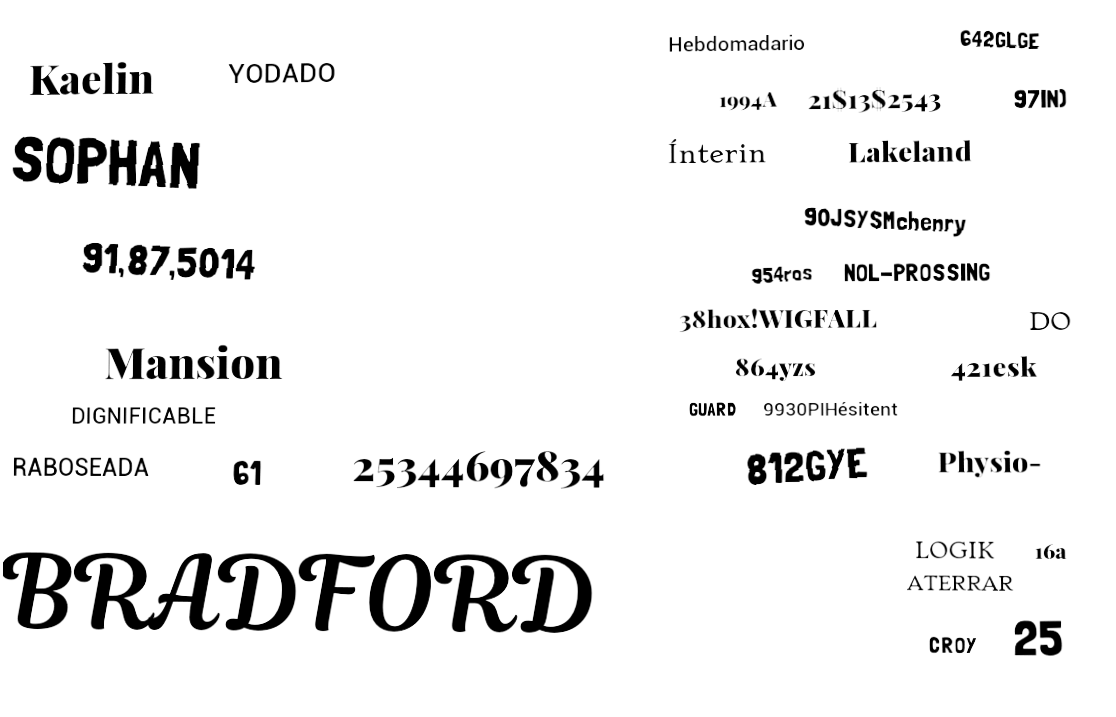

In [119]:
textImage

In [110]:
im = np.array(textImage)
im = (1-im)*255
im[im<255] = 0

In [101]:
np.sum(im == 255)

0

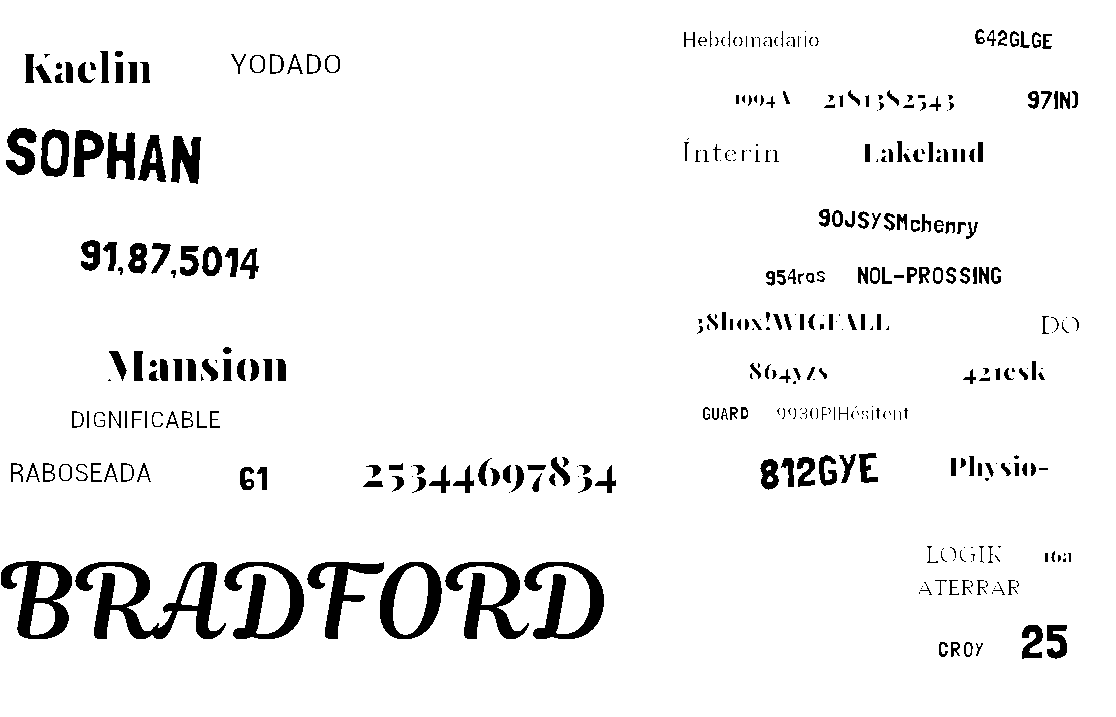

In [120]:

Image.fromarray(im)

In [91]:
plt.imshow(im)
plt.show()

<ipython-input-91-362350d222a9>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


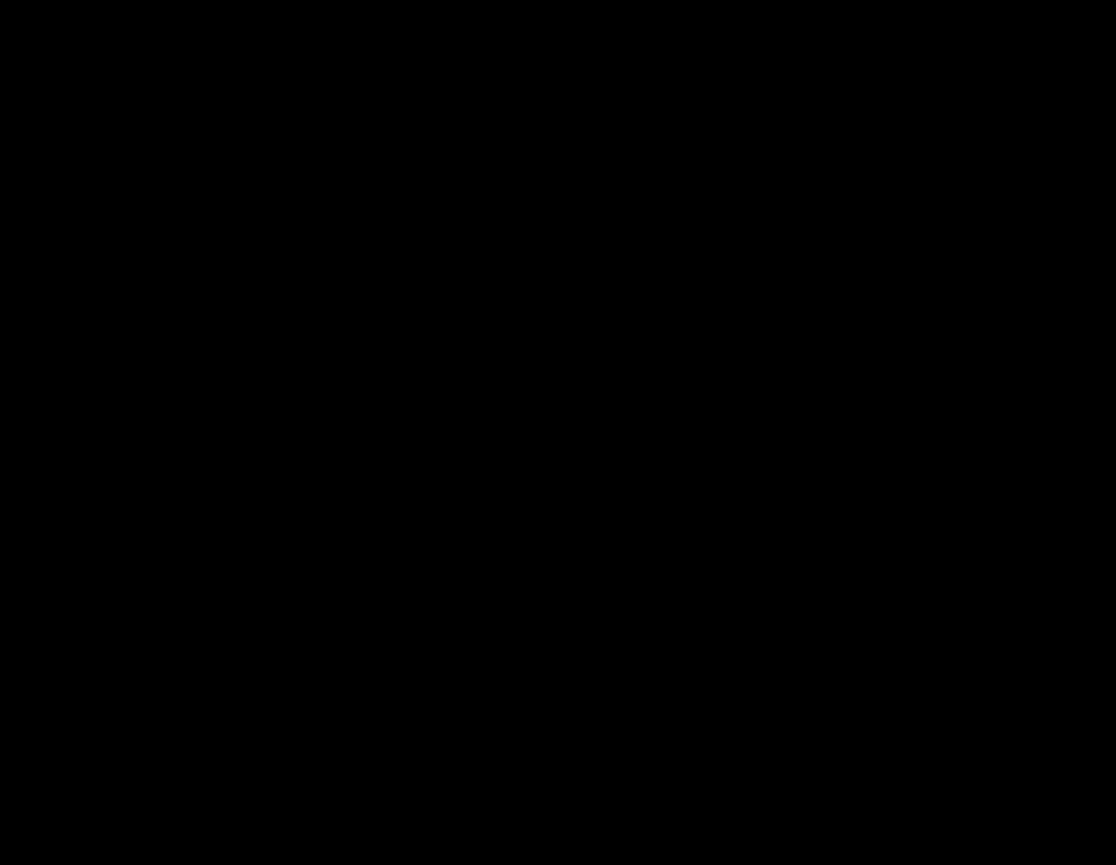

In [69]:
cv2.imwrite(pathToGT + gtName , np.array(np.array(textImage)[:,:,2] < 250,dtype=np.uint8))

True

In [32]:
plt.imshow(np.array(textImage))

In [34]:
im = np.array(np.max(np.array(textImage) > 0, axis=-1),dtype=np.uint8)

In [35]:
im.dtype

dtype('uint8')

In [36]:
im.shape

(571, 1116)

In [37]:
plt.imshow(im)
plt.show()

<ipython-input-37-362350d222a9>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


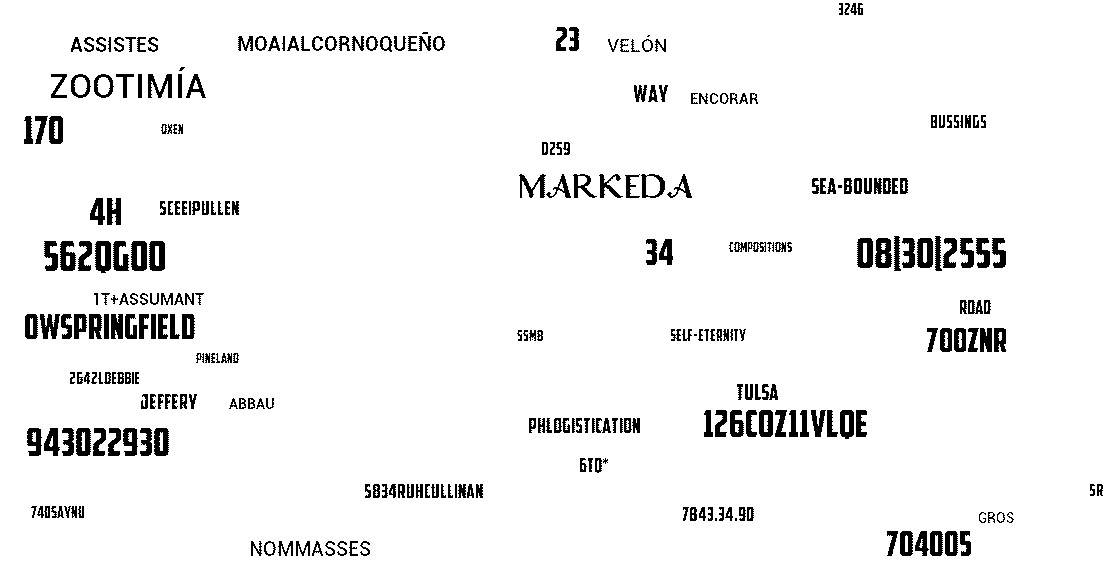

In [38]:
textImage.convert("1")

In [39]:
np.array(np.array(textImage) > 0, dtype=np.int8).shape

(571, 1116, 3)

In [40]:
plt.imshow()

TypeError: imshow() missing 1 required positional argument: 'X'

In [ ]:
imd.annotation

In [ ]:
plt.imshow(imd.characterMap)
plt.show()

In [ ]:
dssd

In [ ]:
# img = Image.fromarray(imd.image).copy()
# w, h = img.size
# w, h = w // 2, h // 2
# w1, h1 = imageTextGenerator.image2.size
# w1, h1 = w1 // 2, h1 // 2

# rotated = rotateRect([w-w1, h-h1, w+w1, h+h1], -imd.angle, h, w)


# src_points = np.float32([[w-w1, h-h1], [w+w1, h-h1], [w+w1,h+h1], [w-w1,h+h1]])

# dst_points = np.float32(rotated)
# print([w,h,w1,h1])
# print(src_points)
# print("*/*/*/")
# print(dst_points)
# projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
# w, h = img.size
# img

In [ ]:
(imd.image[:,:,-1] != 0).sum()

In [ ]:
imd.image[:,:,-1].shape

In [ ]:
983*1266

In [ ]:
1244478 / 699733

In [ ]:
img = Image.fromarray(imd.image).copy()
for symbol in zip(imd.annotation["wordsCharactersRects"]):

    for k in symbol[0]:
        rotated = np.array(k)
        d = ImageDraw.Draw(img)
        #rotated = rotateRect(k, imd.angle)
    #     d.line((rotated[0], rotated[1], rotated[0], rotated[3]), fill=(100,100,100), width=2)
    #     d.line((k[0], k[1], k[2], k[1]), fill=(100,100,100), width=2)
    #     d.line((k[2], k[1], k[2], k[3]), fill=(100,100,100), width=2)
    #     d.line((k[0], k[3], k[2], k[3]), fill=(100,100,100), width=2)
        #rotated = k[0]
        #k = k[0]
#         rotated = k
#         w, h = img.size
#         w, h = w // 2, h // 2
#         w1, h1 = imageTextGenerator.image2.size
#         w1, h1 = w1 // 2, h1 // 2

#         rotated = np.float32([ [k[0][0] + w-w1, k[0][1] + h-h1], [k[1][0] + w-w1, k[1][1]+ h-h1], \
#                             [k[2][0] + w-w1, k[2][1] + h-h1], [k[3][0] + w-w1, k[3][1] + h-h1]] )


#     #     d.line((*rotated[0], *rotated[1]), fill=(195,0,0), width=1)
#     #     d.line((*rotated[1], *rotated[2]), fill=(195,0,0), width=1)
#     #     d.line((*rotated[2], *rotated[3]), fill=(195,0,0), width=1)
#     #     d.line((*rotated[3], *rotated[0]), fill=(195,0,0), width=1)
#     #     print(img.size)
#         w, h = img.size
#         rotated = cv2.perspectiveTransform(np.float32(rotated)[None, :, :], projective_matrix, (w,h))[0]
#        # print(rotated)
        #rotated = rotateRect(k,a)
        d.line((*rotated[0], *rotated[1]), fill=(195,0,0), width=1)
        d.line((*rotated[1], *rotated[2]), fill=(195,0,0), width=1)
        d.line((*rotated[2], *rotated[3]), fill=(195,0,0), width=1)
        d.line((*rotated[3], *rotated[0]), fill=(195,0,0), width=1)

        #break
img

In [ ]:
img = Image.fromarray(imd.image).copy()
print(imd.annotation["wordRects"][0])
for k in zip(imd.annotation["wordRects"]):
    #print(k)
    d = ImageDraw.Draw(img)
    #rotated = rotateRect(k, imd.angle)
#     d.line((rotated[0], rotated[1], rotated[0], rotated[3]), fill=(100,100,100), width=2)
#     d.line((k[0], k[1], /k[2], k[1]), fill=(100,100,100), width=2)
#     d.line((k[2], k[1], k[2], k[3]), fill=(100,100,100), width=2)
#     d.line((k[0], k[3], k[2], k[3]), fill=(100,100,100), width=2)
    rotated = k[0]
    k = k[0]
    rotated = k

    
    d.line((*rotated[0], *rotated[1]), fill=(195,0,0), width=1)
    d.line((*rotated[1], *rotated[2]), fill=(195,0,0), width=1)
    d.line((*rotated[2], *rotated[3]), fill=(195,0,0), width=1)
    d.line((*rotated[3], *rotated[0]), fill=(195,0,0), width=1)

   
    #break
img

In [ ]:
imageTextGenerator.image2

In [ ]:
imd.angle 

In [ ]:
angleRad = (imd.angle + 90) %180 * np.pi / 180

In [ ]:
#angleRad = (-45+ 90) %180 * np.pi / 180

In [ ]:
angleRad

In [ ]:
h,w = imageTextGenerator.image2.size

In [ ]:
!pip3 install PyQt5

In [ ]:
import tkinter

In [ ]:
characters = set()
for word in TextGeneratorGlobal.unicodeWords:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.words:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.cities:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.digits:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.names:
    for c in word:
        characters.add(c)
        
for word in TextGeneratorGlobal.streets:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.surnames:
    for c in word:
        characters.add(c)
for word in TextGeneratorGlobal.symbols:
    for c in word:
        characters.add(c)
for c in string.punctuation:
        characters.add(c)
characters = list(characters)
characters = sorted(characters)

In [ ]:
string.punctuation

In [ ]:
len(characters)

In [ ]:
#for font in [os.path.join(pathToFonts, font) for font in os.listdir(pathToFonts)]:
for font in [os.path.join(pathToFontsUnicode, font) for font in os.listdir(pathToFontsUnicode)]:
    print(font)
    font = ImageFont.truetype(font, 50)
    image =  Image.new("RGBA", (10000,100), (255, 255, 255, 0))
    draw = ImageDraw.Draw(image)
    text = "".join(characters)#string.ascii_letters
    text = '1907Z2748UY'
    h,w = draw.textsize(text, font=font)[::-1]
    color = (255,255,255,255)
    txt = Image.new('L', (w,h))
    d = ImageDraw.Draw(txt)
    d.text((0, 0), text,  font=font, fill=255)
    display(txt)


In [ ]:
txt

In [ ]:
import tkinter as tk

In [ ]:
!pup